Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. As such, there is great business interest in understanding the drivers of, and minimizing staff attrition.

# importing librarys

In [1]:
#importing librarys from sklearn,pandas,imblearn and xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn librarys
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
#pands,imblearn,xgboost librarys
from pandas.api.types import is_string_dtype
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

In [2]:
#ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#pd.set option is use to maximum rows and columns
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

## Read The  TrainData

In [4]:
train_data = pd.read_csv("IBM HR train_data.csv")

In [5]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,38.0,Current employee,Travel_Frequently,888.0,Human Resources,10,4.0,Human Resources,1,17720,141175.0,3.0,Male,71,3.0,2.0,Human Resources,3,Married,6077,14814.0,3.0,Y,No,11,3.0,3.0,80.0,0.0,10.0,2.0,3.0,6.0,3.0,1.0,2.0,Indeed
1,51.0,Current employee,Travel_Rarely,1302.0,Research & Development,2,3.0,Medical,1,4874,128329.0,4.0,Male,84,1.0,2.0,Manufacturing Director,2,Divorced,5482,16321.0,5.0,Y,No,18,3.0,4.0,80.0,1.0,13.0,3.0,3.0,4.0,1.0,1.0,2.0,Indeed
2,32.0,Current employee,Travel_Rarely,128.0,Research & Development,2,1.0,Life Sciences,1,4278,127733.0,4.0,Male,84,2.0,2.0,Laboratory Technician,1,Single,2176,19737.0,1.0,Y,No,13,3.0,4.0,80.0,0.0,9.0,5.0,3.0,6.0,2.0,0.0,4.0,Company Website
3,26.0,Current employee,Travel_Rarely,157.0,Research & Development,1,3.0,Medical,1,19686,143141.0,4.0,Male,90,3.0,2.0,Healthcare Representative,2,Single,5562,24440.0,6.0,Y,No,14,3.0,4.0,80.0,0.0,19.0,3.0,3.0,10.0,7.0,0.0,9.0,GlassDoor
4,46.0,Current employee,Travel_Rarely,734.0,Research & Development,2,4.0,Life Sciences,1,20418,143873.0,3.0,Male,46,3.0,5.0,Research Director,4,Divorced,19328,14218.0,1.0,Y,Yes,17,3.0,3.0,80.0,1.0,24.0,3.0,3.0,2.0,1.0,2.0,2.0,GlassDoor


#Check the shape of data

In [6]:
train_data.shape

(18749, 37)

In [7]:
#checking data type of features
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18749 entries, 0 to 18748
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18746 non-null  float64
 1   Attrition                 18739 non-null  object 
 2   BusinessTravel            18741 non-null  object 
 3   DailyRate                 18738 non-null  float64
 4   Department                18740 non-null  object 
 5   DistanceFromHome          18741 non-null  object 
 6   Education                 18739 non-null  float64
 7   EducationField            18743 non-null  object 
 8   EmployeeCount             18745 non-null  object 
 9   EmployeeNumber            18748 non-null  object 
 10  Application ID            18746 non-null  float64
 11  EnvironmentSatisfaction   18742 non-null  float64
 12  Gender                    18741 non-null  object 
 13  HourlyRate                18741 non-null  object 
 14  JobInv

#checking numeric and categorical features in this dataset

In [8]:
train_data_categoric = train_data.select_dtypes(include = object)
train_data_categoric.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeCount', 'EmployeeNumber', 'Gender',
       'HourlyRate', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'Over18', 'OverTime', 'PercentSalaryHike',
       'Employee Source'],
      dtype='object')

In [9]:
train_data_numeric_fea = train_data.select_dtypes(include=np.number)
train_data_numeric_fea.columns

Index(['Age', 'DailyRate', 'Education', 'Application ID',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'MonthlyRate',
       'NumCompaniesWorked', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# check for is any null values

In [10]:
train_data.isnull().sum()

Age                          3
Attrition                   10
BusinessTravel               8
DailyRate                   11
Department                   9
DistanceFromHome             8
Education                   10
EducationField               6
EmployeeCount                4
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      7
Gender                       8
HourlyRate                   8
JobInvolvement               6
JobLevel                     6
JobRole                      8
JobSatisfaction              8
MaritalStatus                8
MonthlyIncome               12
MonthlyRate                 10
NumCompaniesWorked           6
Over18                       6
OverTime                     7
PercentSalaryHike           13
PerformanceRating            9
RelationshipSatisfaction     5
StandardHours                8
StockOptionLevel             8
TotalWorkingYears            6
TrainingTimesLastYear        8
WorkLifeBalance              8
YearsAtC

In [11]:
Null_values_percentage=(train_data.isnull().sum().sum()/len(train_data))*100
Null_values_percentage

1.5147474531975038

# In Our Data there are 1.5% of Null Values
#there are two option  to treating null the values we can compute with mean, median and mode or Insted of computing them we can directly DROP them because Dropped % of Null values is very less It wont affect our Model

In [12]:
#computing null values of catogoric features with mode
for column in ["Attrition","BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime","Employee Source"]:
    train_data[column].fillna(train_data[column].mode()[0], inplace=True)

In [13]:
#computing null values of all numeric featurs with median
train_data=train_data.fillna(train_data.median())

In [14]:
train_data.isnull().sum()

Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             8
Education                    0
EducationField               0
EmployeeCount                4
EmployeeNumber               1
Application ID               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   8
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              8
MaritalStatus                0
MonthlyIncome               12
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike           13
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtC

#Except catagoric features and numeric features there are some features having numeric data mixed with string we have to delete not belonging sting from the column 

In [15]:
# in DistanceFromHome column Research & Development is mixed
train_data.DistanceFromHome.unique()

array(['10', '2', '1', '11', '9', '28', '6', '29', '5', '3', '25', '14',
       '4', '8', '19', '26', '7', '16', '22', '20', '15', '18', '24',
       '13', '12', '27', '23', '21', '17', nan, 'Research & Development',
       7, 9, 2, 1, 18, 6, 8, 22, 20, 11, 15, 4, 29, 19, 28, 17, 10, 25,
       24, 3, 14, 27, 5, 23, 21, 16, 26, 13, 12], dtype=object)

In [16]:
# in employe number column also 3 un matched strings are there
train_data = train_data[train_data.DistanceFromHome != 'Research & Development']
train_data = train_data[train_data.EmployeeNumber != 'Test']
train_data = train_data[train_data.EmployeeNumber != 'TESTING']
train_data = train_data[train_data.EmployeeNumber != 'TEST']

In [17]:
# rename the column name to avoid the error
train_data.rename(columns = {'Application ID':'Application_ID'}, inplace = True)

In [18]:
# in application_id and hourlyrate column also there are 3 unmatched string are there
train_data = train_data[train_data.Application_ID != '?????']
train_data = train_data[train_data.Application_ID != 'Test']
train_data = train_data[train_data.HourlyRate != 'Female']

In [19]:
#now all unbelonging values deletd we can impute missing values with median
for column in ['DistanceFromHome','EmployeeCount','EmployeeNumber','Application_ID','HourlyRate','JobSatisfaction','MonthlyIncome','PercentSalaryHike']:
        train_data[column].fillna(train_data[column].median(), inplace=True)

In [20]:
train_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Application_ID              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

<AxesSubplot:>

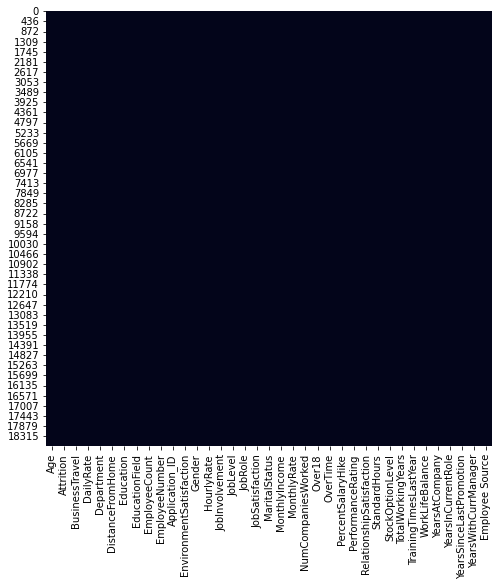

In [21]:
fig, ax = plt.subplots(figsize=(8,8))  
sns.heatmap(train_data.isnull(), cbar=False)

# 284 null values are present in our dataset
now there is no null values all are computed with median and mode

In [22]:
#checking datatype of featues
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18746 entries, 0 to 18748
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18746 non-null  float64
 1   Attrition                 18746 non-null  object 
 2   BusinessTravel            18746 non-null  object 
 3   DailyRate                 18746 non-null  float64
 4   Department                18746 non-null  object 
 5   DistanceFromHome          18746 non-null  object 
 6   Education                 18746 non-null  float64
 7   EducationField            18746 non-null  object 
 8   EmployeeCount             18746 non-null  object 
 9   EmployeeNumber            18746 non-null  object 
 10  Application_ID            18746 non-null  float64
 11  EnvironmentSatisfaction   18746 non-null  float64
 12  Gender                    18746 non-null  object 
 13  HourlyRate                18746 non-null  object 
 14  JobInv

## changing data type of features
some featues having numeric values but object datatype we can chnge that features to int or float it can help to future implimentation

In [23]:
for col in['DistanceFromHome','EmployeeCount','EmployeeNumber','Application_ID','HourlyRate','JobSatisfaction','MonthlyIncome','PercentSalaryHike']:
     train_data[col] = train_data[col].astype('float')

In [24]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of all categorical variables as tere are no numerical variables in the dataset
train_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,Application_ID,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,18746.000000,18746.000000,18746.000000,18746.000000,18746.0,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.0,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000,18746.000000
mean,36.923770,799.801611,9.125627,2.914115,1.0,11739.603702,135193.865011,2.717326,65.901312,2.731463,2.065187,2.728742,6513.544756,14280.975568,2.697696,15.214606,3.157260,2.715993,80.0,0.794303,11.292969,2.799477,2.762243,7.012696,4.228475,2.193428,4.131388
std,9.117747,401.847026,8.074999,1.025254,0.0,6784.950626,6783.288624,1.095131,20.319638,0.709956,1.106356,1.103346,4708.205979,7105.726066,2.500913,3.659746,0.364056,1.077868,0.0,0.854306,7.792792,1.290241,0.706685,6.135176,3.627747,3.234258,3.572048
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,123456.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,5873.500000,129328.500000,2.000000,48.000000,2.000000,1.000000,2.000000,2929.000000,8039.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,799.000000,7.000000,3.000000,1.0,11706.500000,135160.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4936.000000,14180.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1151.000000,14.000000,4.000000,1.0,17602.500000,141055.750000,4.000000,83.000000,3.000000,3.000000,4.000000,8380.000000,20462.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,23517.000000,146972.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Checking and Removal of Outliers

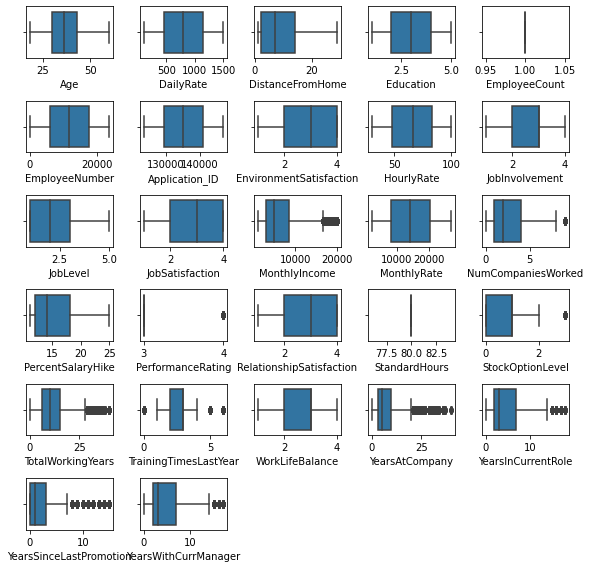

In [25]:
#checking outlier using boxplot
object_ = train_data.select_dtypes(include=["object"]).columns
count = 1
plt.figure(figsize=(8,8))
for i in train_data.columns:
    if i not in object_:
        plt.subplot(6,5,count)
        sns.boxplot(train_data[i])
        count = count+1
plt.tight_layout()

We can See some Outliers are present in the data We can remove them if Model isnot performing well.

# Removal of outlier using IQR

In [26]:
#removing outlier using inter qurtile range
Q1=train_data.quantile(0.25)

Q3=train_data.quantile(0.75)

IQR=Q3-Q1

condition = ~((train_data < (Q1 - 1.5 * IQR)) | (train_data > (Q3 + 1.5 * IQR))).any(axis=1)


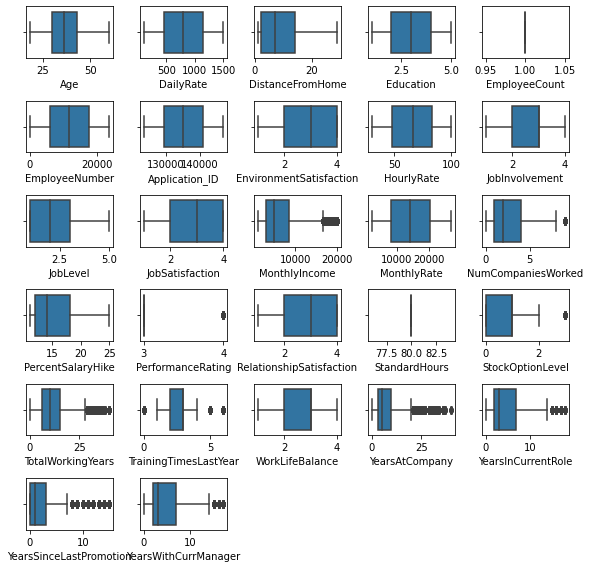

In [27]:
#after removal of outlier checking outlier goes or not using boxplot
object_ = train_data.select_dtypes(include=["object"]).columns
count = 1
plt.figure(figsize=(8,8))
for i in train_data.columns:
    if i not in object_:
        plt.subplot(6,5,count)
        sns.boxplot(train_data[i])
        count = count+1
plt.tight_layout()

#changing  catagorical values from target column to numerical values for future implimentation

In [28]:
train_data.Attrition.value_counts()

Current employee         15788
Voluntary Resignation     2958
Name: Attrition, dtype: int64

In [29]:
# using label_encoder to convert catagoric value to numeric
#In the target column (attrition) only 2 classification are there so that we can use labele encoder for encoding
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Attrition'.
train_data['Attrition']= label_encoder.fit_transform(train_data['Attrition'])
train_data.Attrition.value_counts()

0    15788
1     2958
Name: Attrition, dtype: int64

# cheking numeric and catogorical featues present in the dataset

In [30]:
train_data_categoric = train_data.select_dtypes(include = object)
train_data_categoric.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime', 'Employee Source'],
      dtype='object')

In [31]:
train_data_numeric = train_data.select_dtypes(include=np.number)
train_data_numeric.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'Application_ID',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

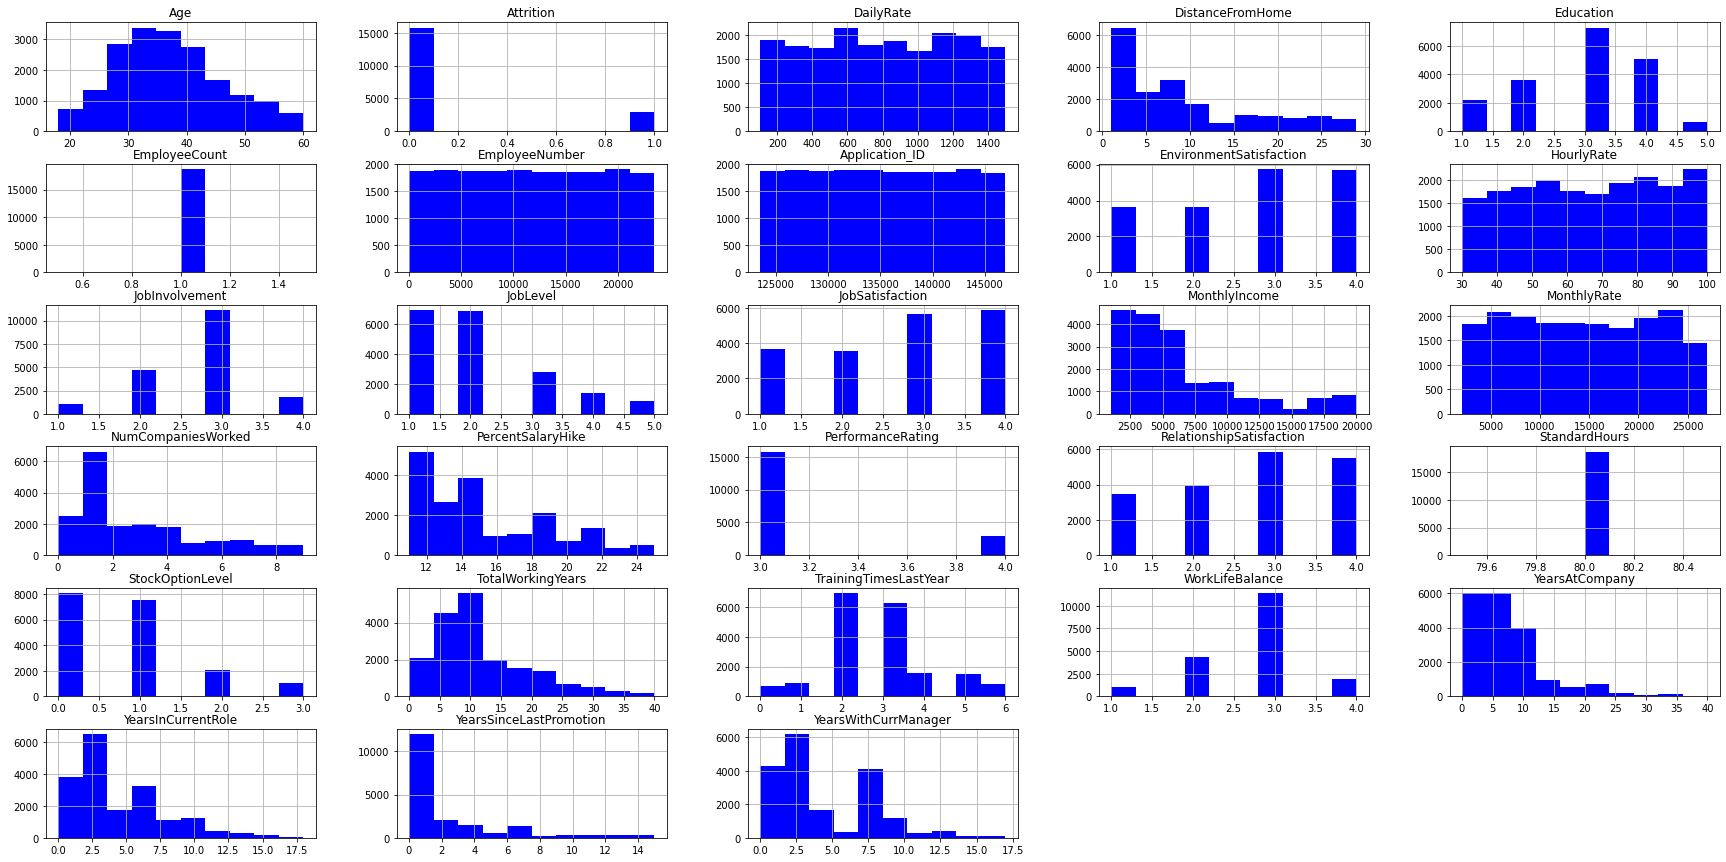

In [32]:
#ploting histogram to check distribution of data
train_data.hist( color = "blue",figsize=([30,15]))
plt.show

Text(0.5, 1.0, 'Attrition')

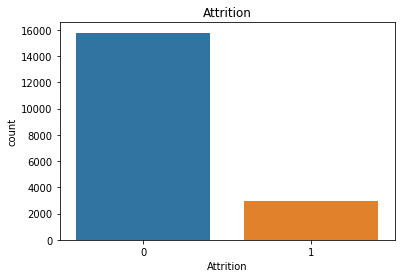

In [33]:
#ploting countplot to check distribution of data and numberof data present target column
sns.countplot(train_data['Attrition'])
plt.title('Attrition')

In [34]:
#checking co-realation of data
corr=train_data.corr()
corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,Application_ID,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159958,0.005707,-0.001621,0.204928,NaN,-0.023230,-0.023397,-0.004680,-0.008892,-0.006805,0.247756,-0.030304,0.240872,0.040820,0.031670,-0.006853,-0.003476,0.018321,NaN,0.005342,0.328039,-0.000919,-0.006199,0.143972,0.102676,0.103070,0.088526
Attrition,-0.159958,1.000000,-0.052803,0.071553,-0.034962,NaN,-0.000703,-0.000596,-0.040735,0.015209,-0.065065,-0.082512,-0.046237,-0.076439,-0.008891,0.047818,-0.028861,-0.009316,-0.006911,NaN,-0.094818,-0.082899,-0.045577,-0.020234,-0.057353,-0.080225,-0.016884,-0.063443
DailyRate,0.005707,-0.052803,1.000000,-0.009455,-0.026659,NaN,-0.019314,-0.019446,0.005381,0.025704,0.008473,-0.018532,0.008492,-0.010645,-0.011498,0.011544,0.025743,0.009646,-0.003886,NaN,0.012758,-0.000313,-0.021823,-0.033951,-0.036717,-0.013723,-0.031002,-0.036797
DistanceFromHome,-0.001621,0.071553,-0.009455,1.000000,0.017033,NaN,0.019222,0.019139,0.004915,0.023683,0.010901,0.006207,-0.011462,0.000994,-0.009697,0.062250,0.018062,0.003097,-0.024708,NaN,0.012438,0.012769,-0.011878,-0.004198,0.002650,0.000717,-0.000708,-0.005940
Education,0.204928,-0.034962,-0.026659,0.017033,1.000000,NaN,0.006217,0.006301,-0.028656,-0.009234,0.015879,0.046700,-0.022907,0.039960,-0.005509,0.024515,0.004202,-0.004975,-0.022025,NaN,0.019967,0.066676,-0.003744,0.007379,0.026550,0.043687,0.032199,0.037969
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.023230,-0.000703,-0.019314,0.019222,0.006217,NaN,1.000000,0.999753,0.472499,0.338389,-0.012115,-0.018011,-0.041653,-0.015841,0.010549,0.009338,-0.019403,-0.016416,-0.068196,NaN,0.068096,-0.014868,0.015276,0.013604,-0.013112,-0.011621,-0.007251,-0.012199
Application_ID,-0.023397,-0.000596,-0.019446,0.019139,0.006301,NaN,0.999753,1.000000,0.472525,0.338619,-0.011886,-0.018006,-0.041508,-0.015977,0.010614,0.009164,-0.019070,-0.016353,-0.068332,NaN,0.068040,-0.014989,0.014826,0.013515,-0.013045,-0.011623,-0.007079,-0.012197
EnvironmentSatisfaction,-0.004680,-0.040735,0.005381,0.004915,-0.028656,NaN,0.472499,0.472525,1.000000,0.402900,-0.017838,-0.009404,-0.022887,-0.013854,0.019648,0.003956,-0.017794,-0.004506,-0.031318,NaN,0.030621,-0.011074,-0.010820,0.016277,-0.014552,-0.008209,-0.006055,-0.020276
HourlyRate,-0.008892,0.015209,0.025704,0.023683,-0.009234,NaN,0.338389,0.338619,0.402900,1.000000,0.018531,-0.019583,-0.042336,-0.013254,-0.008170,0.012967,-0.010844,-0.009830,-0.031247,NaN,0.044731,-0.007324,-0.010042,0.004087,-0.020779,-0.024095,-0.018156,-0.020637


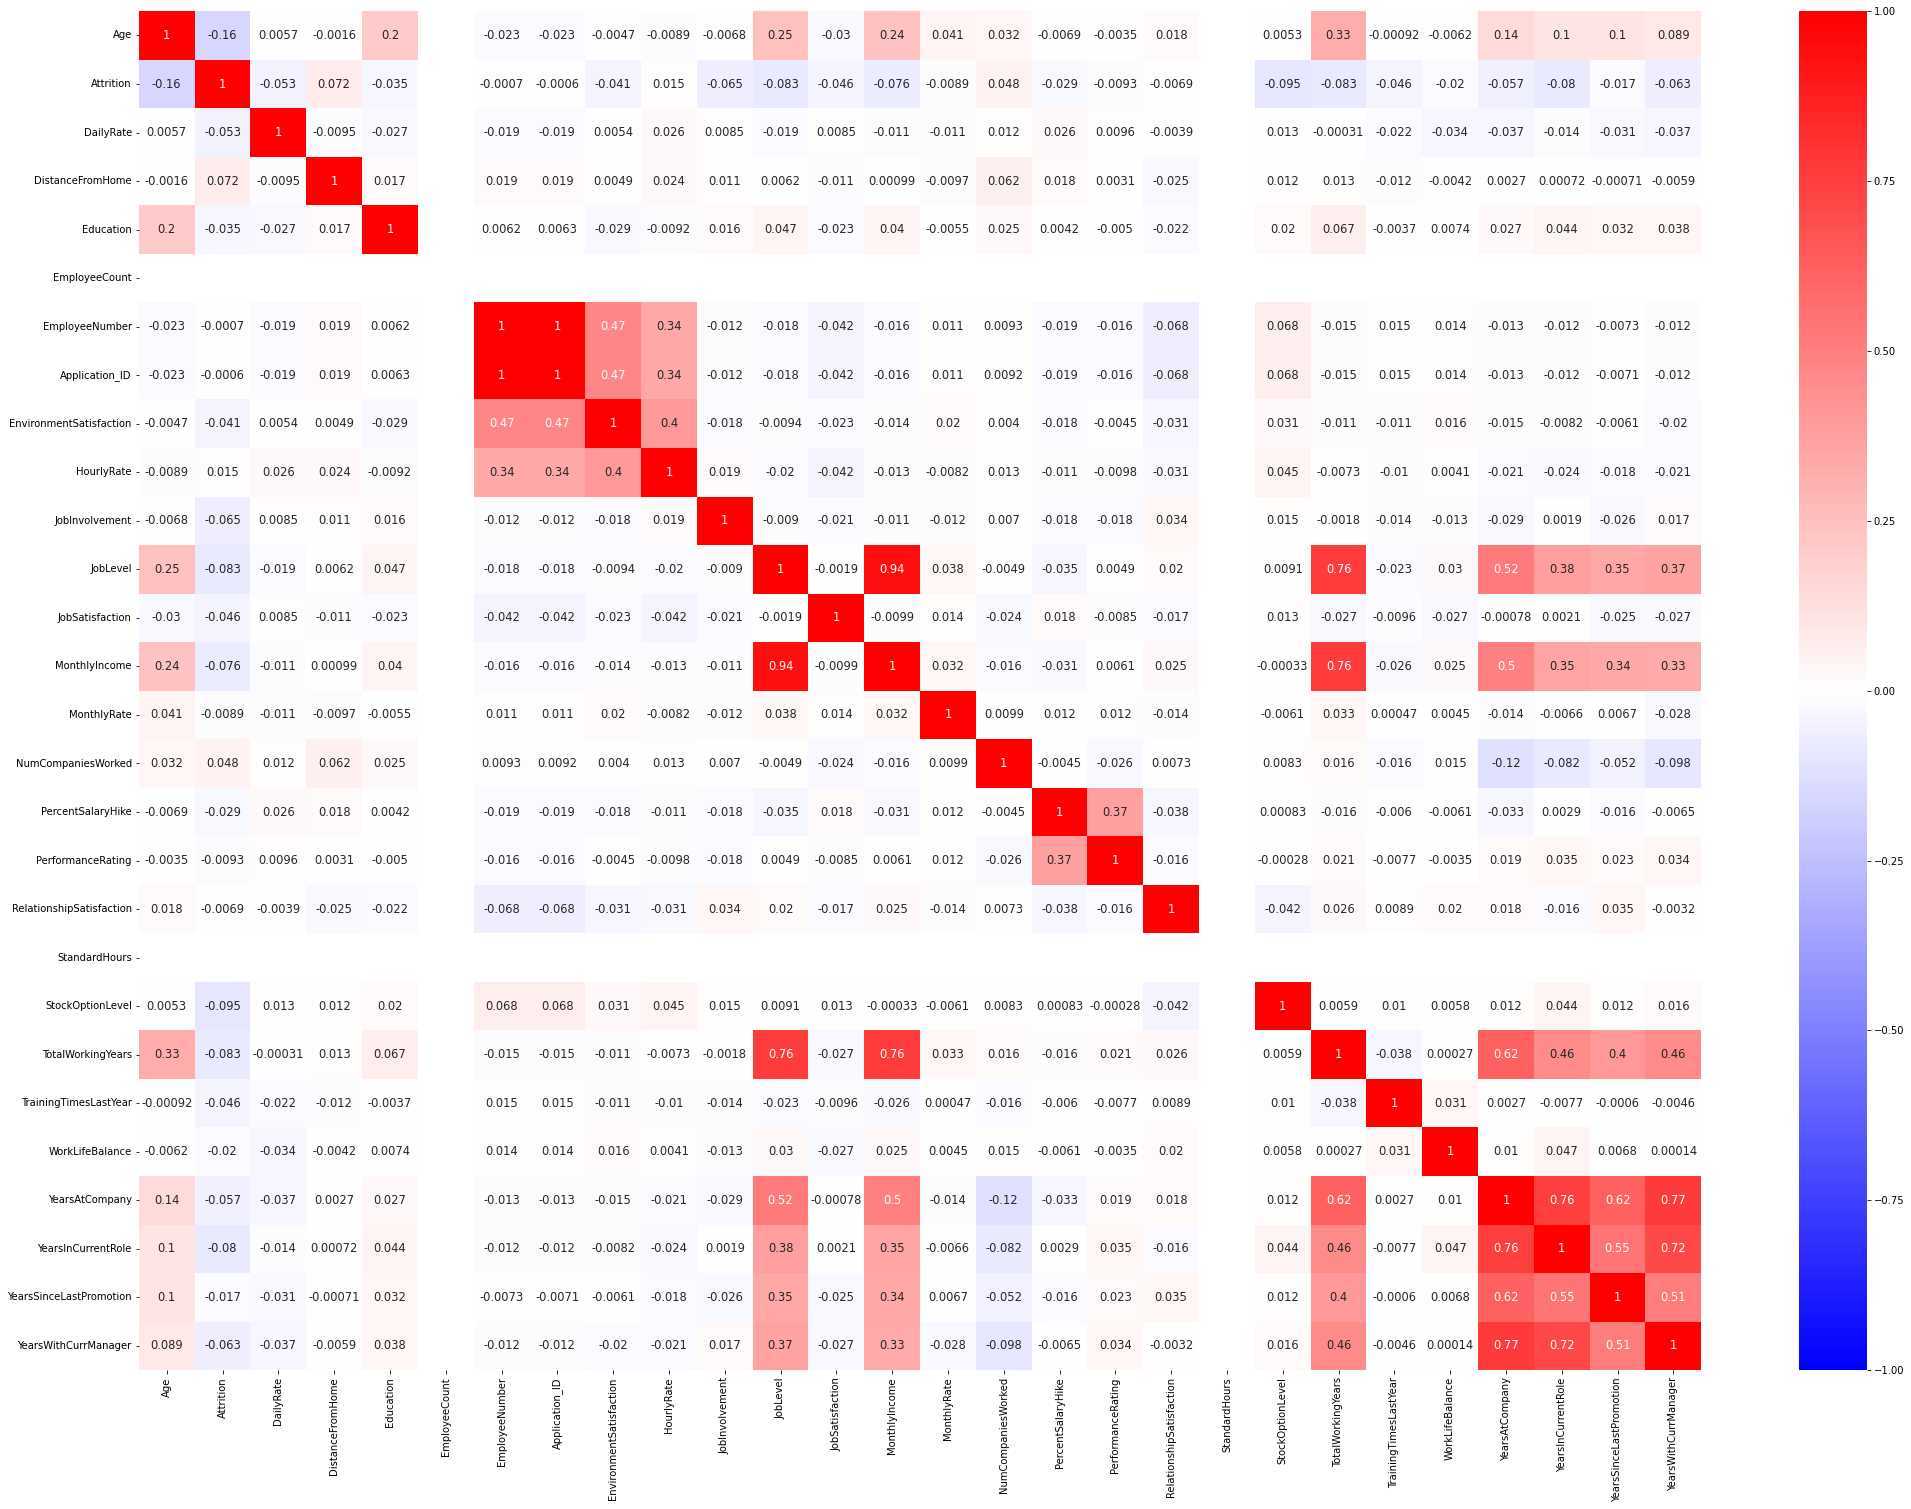

In [35]:
#ploting correlation
plt.figure(figsize = (35,25))
sns.heatmap(corr, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'bwr', annot_kws = {"size": 11.5})
plt.show()

In [36]:
#removing Unnecessary column from data set 
train_data=train_data.drop(['Application_ID'],axis=1)
train_data=train_data.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],axis=1)

#Application_id, over18,Employeenumber,standarhours and Employeecount these coloumns are not important and they do not take major role in this model so droped

In [37]:
train_data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='count'>

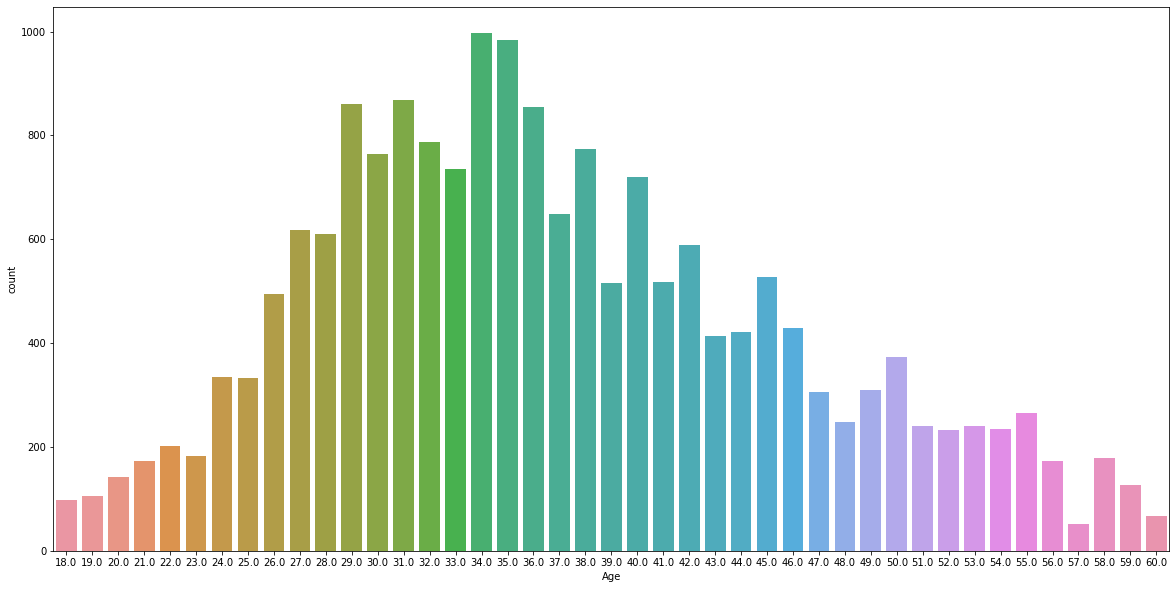

In [38]:
#ploting to check distribution of age column
plt.figure(figsize=[20,10])
sns.countplot(train_data['Age'])

 #Majority of employees lie between the age range of 30 to 40

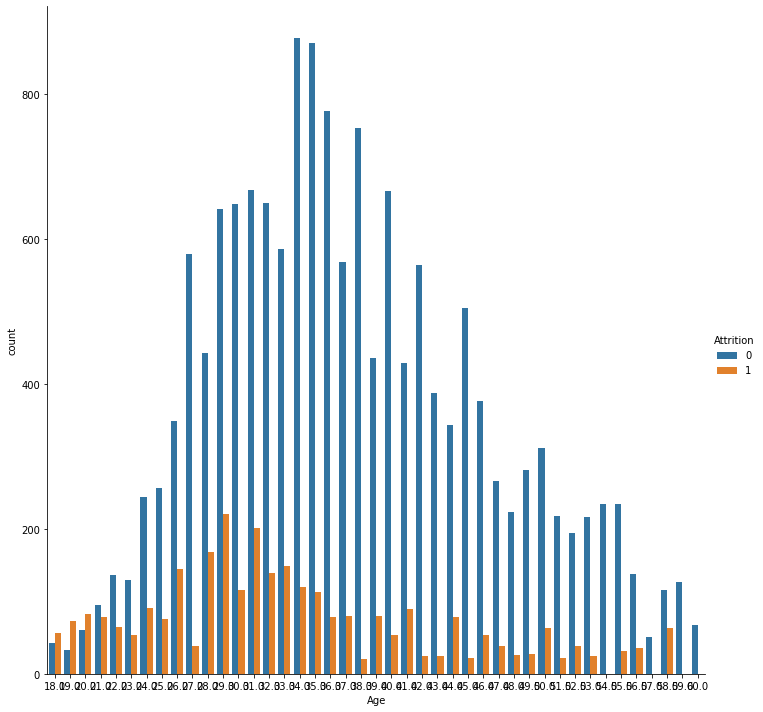

In [39]:
#comparission of age with attrition
sns.catplot(x='Age',hue='Attrition',data=train_data,kind='count',height=10)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

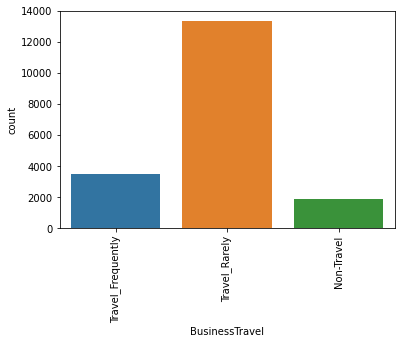

In [40]:
#plolting bussines travel using count plot
plt.xticks(rotation='vertical')
sns.countplot(train_data['BusinessTravel'])

#in business travel employee travel rarely is high

<AxesSubplot:xlabel='Department', ylabel='count'>

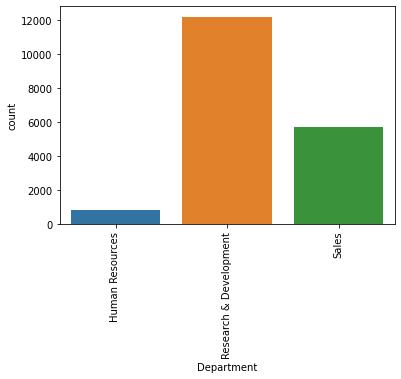

In [41]:
#checking  number of department using count plot
plt.xticks(rotation='vertical')
sns.countplot(train_data['Department'])

<AxesSubplot:xlabel='Department', ylabel='Attrition'>

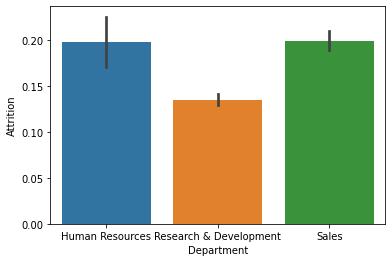

In [42]:
#comparing department with attrition
sns.barplot(train_data.Department,train_data.Attrition,data=train_data)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

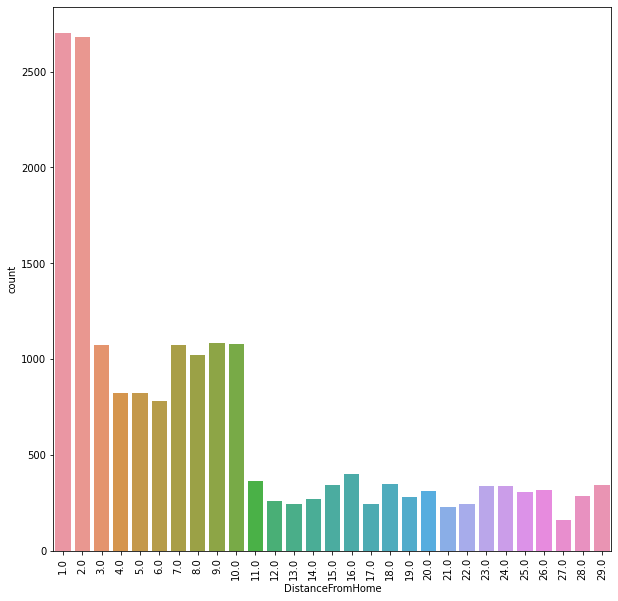

In [43]:
#ploting distance from home of employee
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(train_data['DistanceFromHome'])

<AxesSubplot:xlabel='Education', ylabel='count'>

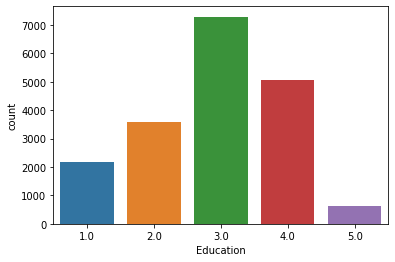

In [44]:
#ploting education status 
train_data['Education'].value_counts()
sns.countplot(train_data['Education'])

In [45]:
#checking no values inbEducationField
train_data.EducationField.value_counts()

Life Sciences       7753
Medical             5871
Marketing           2054
Technical Degree    1655
Other               1057
Human Resources      355
Test                   1
Name: EducationField, dtype: int64

In [46]:
#replacing single value of EducationField test to other because there no test field is there it mistakenly added so
train_data['EducationField'] = train_data['EducationField'].replace(['Test'],'Other')

<AxesSubplot:xlabel='EducationField', ylabel='count'>

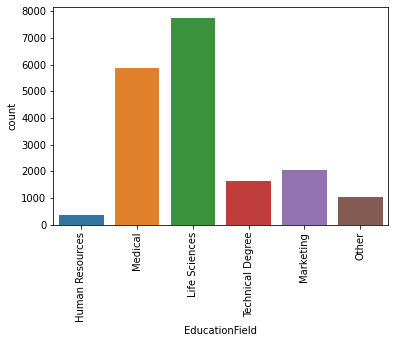

In [47]:
#ploting number of educationfield using count plot
plt.xticks(rotation='vertical')
sns.countplot(train_data['EducationField'])

#Around 30% of employees have education level of 3  

#Around 70% of employees are having 'Life Sciences' and 'Medical' education field.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Medical'),
  Text(2, 0, 'Life Sciences'),
  Text(3, 0, 'Technical Degree'),
  Text(4, 0, 'Marketing'),
  Text(5, 0, 'Other')])

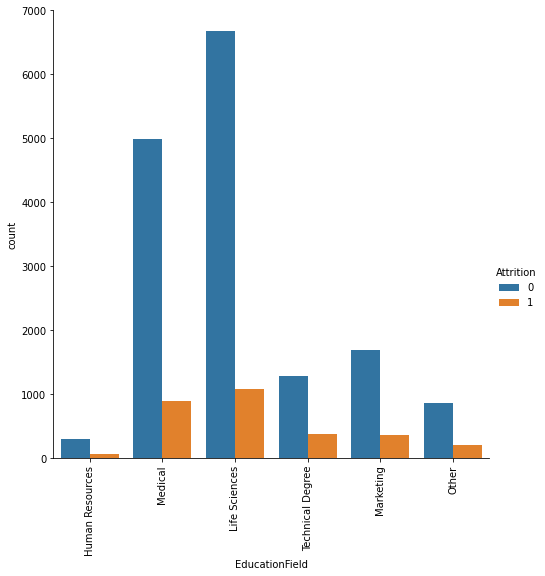

In [48]:
#comparing education field with attrition
sns.catplot(x='EducationField',hue='Attrition',kind='count',data=train_data,height=7)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Gender', ylabel='count'>

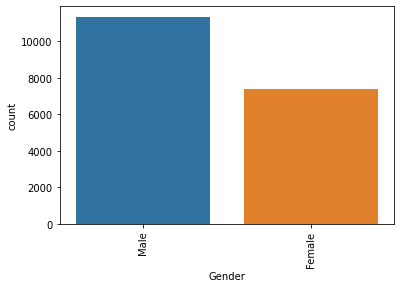

In [49]:
#ploting gender column
plt.xticks(rotation='vertical')
sns.countplot(train_data['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Attrition'>

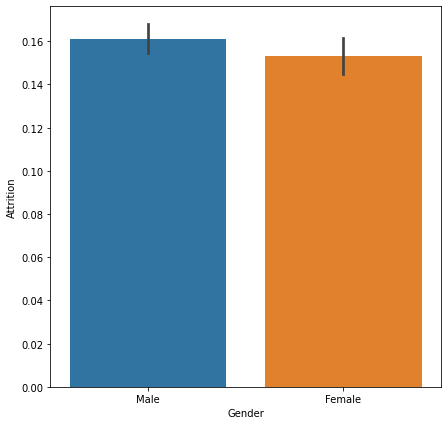

In [50]:
#comparing gender with attrition
plt.figure(figsize=[7.,7])
sns.barplot(train_data.Gender,train_data.Attrition,data=train_data,hue_order='Attrition')

#Attrition rate of male is higher than female

<AxesSubplot:xlabel='BusinessTravel', ylabel='Attrition'>

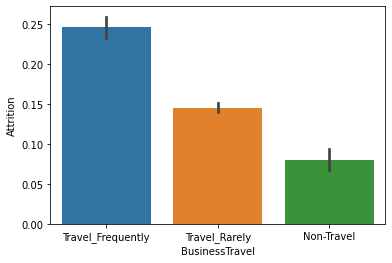

In [51]:
#comparing bussiness travel with attrition
sns.barplot(train_data.BusinessTravel,train_data.Attrition,data=train_data)

#People travels More there attrition level is Higher 

<AxesSubplot:ylabel='count'>

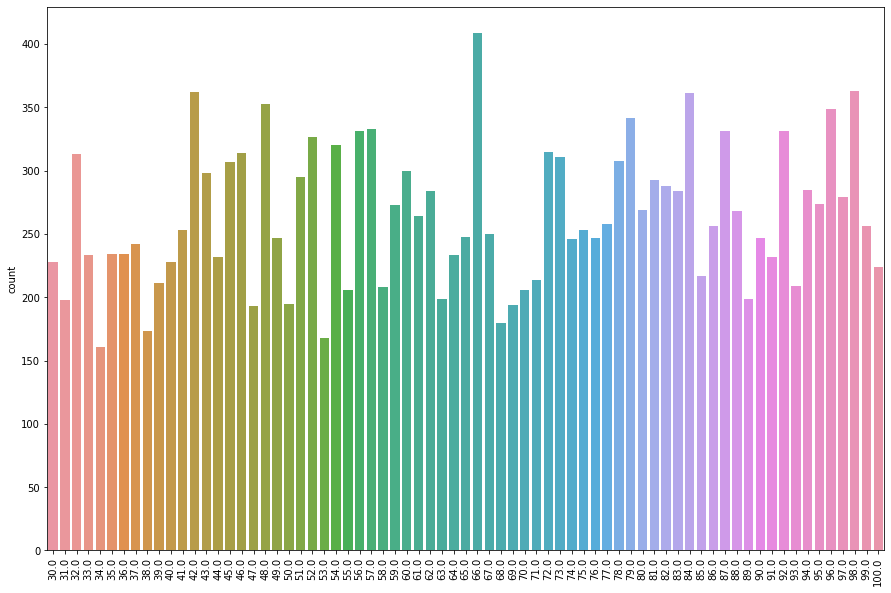

In [52]:
#ploting hourlyrate of employee
plt.figure(figsize=[15,10])
plt.xticks(rotation='vertical')
sns.countplot(sorted(train_data['HourlyRate']))

<AxesSubplot:ylabel='count'>

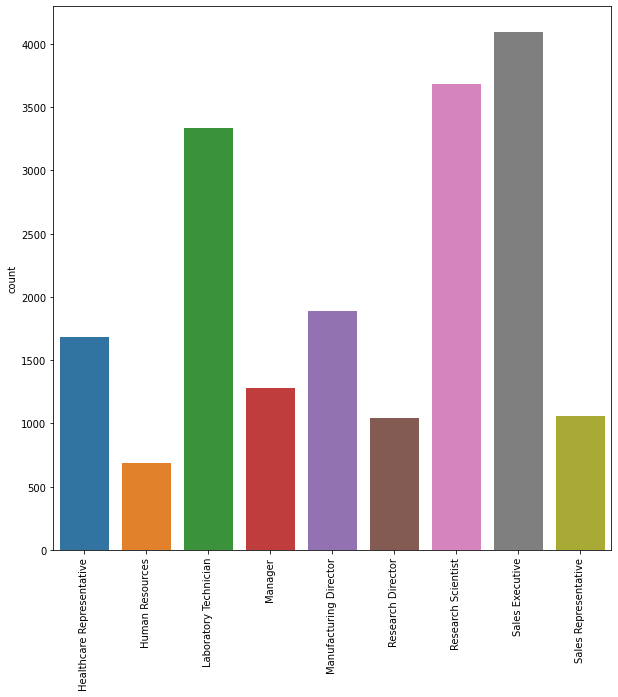

In [53]:
#ploting number of jobrole pesent in data
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(sorted(train_data['JobRole']))

<AxesSubplot:xlabel='JobRole', ylabel='Attrition'>

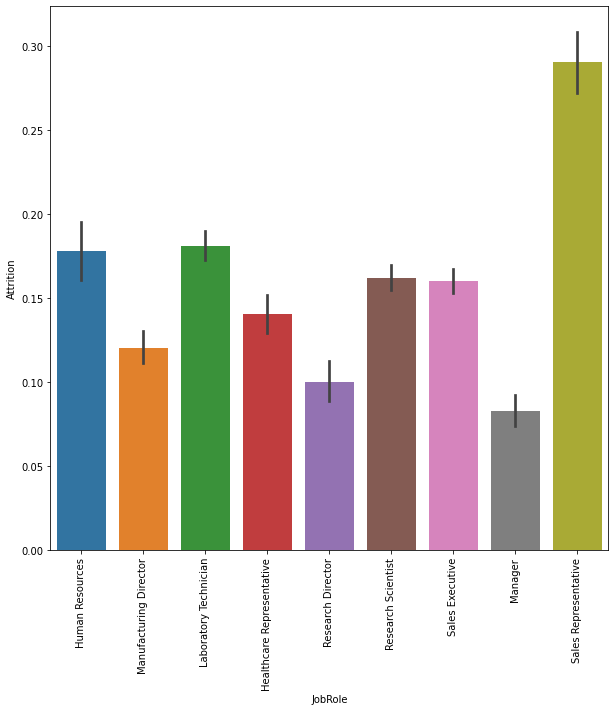

In [54]:
#comparission between attrition and jobrole
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.barplot(train_data.JobRole,train_data.Attrition,data= train_data,ci=80,hue_order='attrition')

#Attrition of sales representive is more 

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Attrition'>

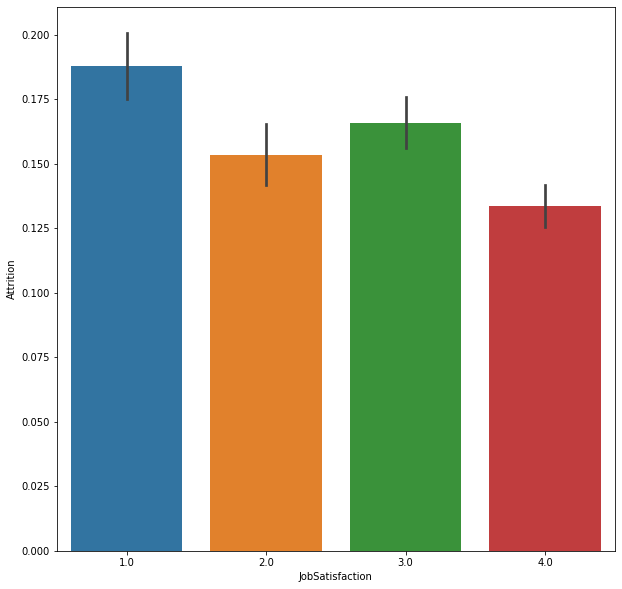

In [55]:
#comaring jobsatisfation with attrition
plt.figure(figsize=[10,10])
plt.xticks(rotation=0)
sns.barplot(train_data.JobSatisfaction,train_data.Attrition,data= train_data)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Attrition'>

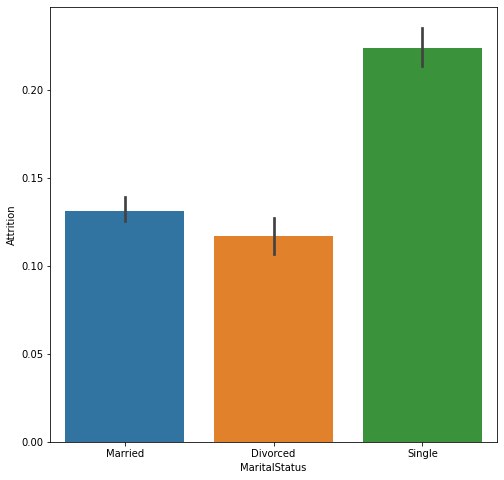

In [56]:
#comparing maritalstatus with attrition
plt.figure(figsize=[8,8])
plt.xticks(rotation=0)
sns.barplot(train_data.MaritalStatus,train_data.Attrition,data= train_data)

<AxesSubplot:xlabel='OverTime', ylabel='Attrition'>

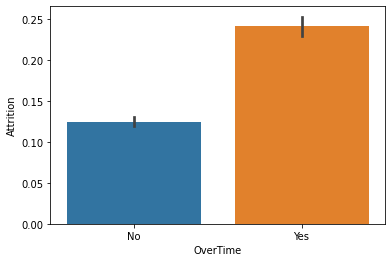

In [57]:
#comparing overtime with attrition
sns.barplot(train_data.OverTime,train_data.Attrition,data=train_data)

In [58]:
#replacing single value of Employee Source test to Referral because there is no test field is there it mistakenly added so replacing it
train_data['Employee Source'] = train_data['Employee Source'].replace(['Test'],'Referral')

<AxesSubplot:ylabel='count'>

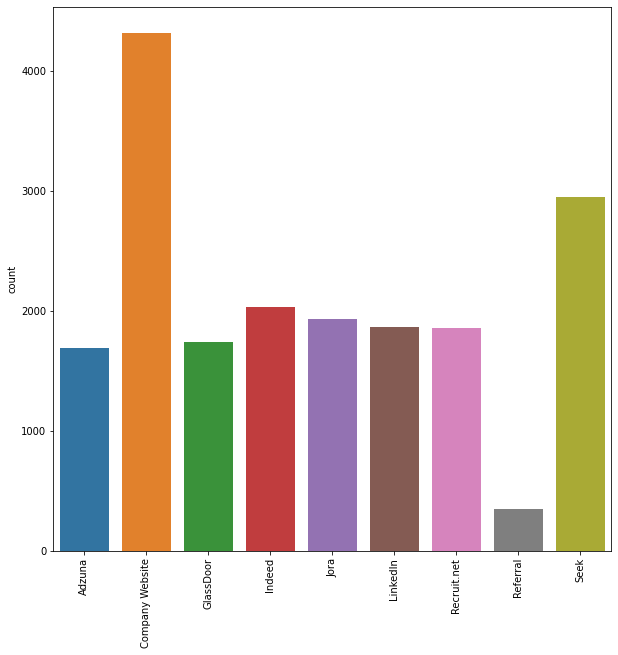

In [59]:
#counting number of employee source using count plot
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(sorted(train_data['Employee Source']))

* After Visualization we got know majority of employes age 30-40 have more attrition rate
* Attrition rate of male is high compared to female
* The employees travel more whose attrition rate is high
* job role like sales representative attrition rate is high
* single people attriton is more compared to married people

In [60]:
#checking shape of data after all cleaning
train_data.shape

(18746, 32)

In [61]:
#checking numeric features
numeric_fea = train_data.select_dtypes(include=np.number)
numeric_fea.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [62]:
#checking catagorical features
categoric = train_data.select_dtypes(include = object)
categoric.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Employee Source'],
      dtype='object')

# Data Preprocessing

In [63]:
#making encoding for changing catagoricl values to numerical using dummy encoding
dummy_encode = pd.get_dummies(categoric, drop_first = True)

In [64]:
#joining the dummy encoded values and numeric values for future moddel building
train_data_dummy = pd.concat([numeric_fea, dummy_encode], axis=1)
train_data_dummy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,38.0,0,888.0,10.0,4.0,3.0,71.0,3.0,2.0,3.0,6077.0,14814.0,3.0,11.0,3.0,3.0,0.0,10.0,2.0,3.0,6.0,3.0,1.0,2.0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,51.0,0,1302.0,2.0,3.0,4.0,84.0,1.0,2.0,2.0,5482.0,16321.0,5.0,18.0,3.0,4.0,1.0,13.0,3.0,3.0,4.0,1.0,1.0,2.0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,32.0,0,128.0,2.0,1.0,4.0,84.0,2.0,2.0,1.0,2176.0,19737.0,1.0,13.0,3.0,4.0,0.0,9.0,5.0,3.0,6.0,2.0,0.0,4.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,26.0,0,157.0,1.0,3.0,4.0,90.0,3.0,2.0,2.0,5562.0,24440.0,6.0,14.0,3.0,4.0,0.0,19.0,3.0,3.0,10.0,7.0,0.0,9.0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,46.0,0,734.0,2.0,4.0,3.0,46.0,3.0,5.0,4.0,19328.0,14218.0,1.0,17.0,3.0,3.0,1.0,24.0,3.0,3.0,2.0,1.0,2.0,2.0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [65]:
#sepetaring target column(attrition) from dataset(spliting x and y)
X=train_data_dummy.drop(['Attrition'], axis = 1)
y=train_data_dummy[['Attrition']]

In [66]:
X.shape

(18746, 52)

In [67]:
y.shape

(18746, 1)

#spliting data data into train and test

In [68]:
# Splitting Dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (14996, 52)
The shape of X_test is: (3750, 52)
The shape of y_train is: (14996, 1)
The shape of y_test is: (3750, 1)


# Model Building

### Using Logistic Regression

In [69]:
# creating object for model
logisticRegr = LogisticRegression(max_iter=120,random_state=0, n_jobs=2)
# Model Training
logisticRegr.fit(X_train, y_train)
# Making Predictions
y_pred_lr = logisticRegr.predict(X_test)
# Calculating Accuracy of the model
lr = round(accuracy_score(y_test, y_pred_lr)*100,2)
print(lr)

84.0


In [70]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[3149    1]
 [ 599    1]]


In [71]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3150
           1       0.50      0.00      0.00       600

    accuracy                           0.84      3750
   macro avg       0.67      0.50      0.46      3750
weighted avg       0.79      0.84      0.77      3750



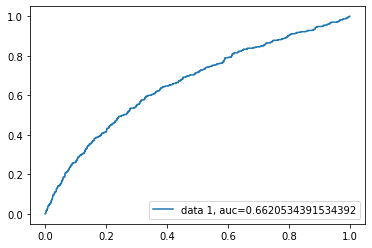

In [72]:
#  ploting  the AUC-ROC curve 
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Using Decision tree classifier 

In [73]:
# Creating object of the model
model_dt = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [74]:
#making prediction
y_pred_dt=model_dt.predict(X_test)
# Calculating Accuracy of the model
dt  = round(accuracy_score(y_test, y_pred_dt)*100, 2)
print(dt)    


85.33


In [75]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)

[[3131   19]
 [ 531   69]]


In [76]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3150
           1       0.78      0.12      0.20       600

    accuracy                           0.85      3750
   macro avg       0.82      0.55      0.56      3750
weighted avg       0.84      0.85      0.80      3750



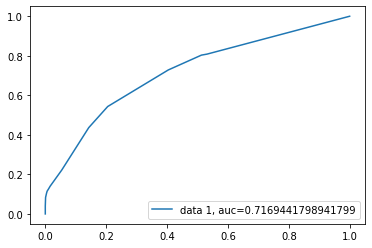

In [77]:
#  ploting  the AUC-ROC curve 
y_pred_proba = model_dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Using Random Forest

In [78]:
# Creating model object
model_r_f = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0,max_depth=5,min_samples_split=10000)
# Training Model
model_r_f.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5,
                       min_samples_split=10000, random_state=0)

In [79]:
# Making Prediction
y_pred_rf = model_r_f.predict(X_test)
# Calculating Accuracy Score
rf = round(accuracy_score(y_test, y_pred_rf)*100, 2)
print(rf)

84.0


In [80]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

[[3150    0]
 [ 600    0]]


In [81]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3150
           1       0.00      0.00      0.00       600

    accuracy                           0.84      3750
   macro avg       0.42      0.50      0.46      3750
weighted avg       0.71      0.84      0.77      3750



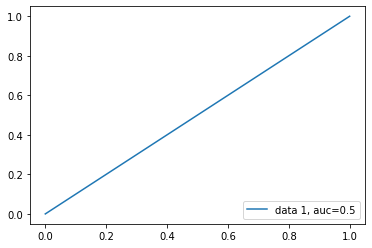

In [82]:
#  ploting  the AUC-ROC curve 
y_pred_proba = model_r_f.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Using XGBoost Classifier

In [83]:
# Creating model object
model_xgb = XGBClassifier(random_state=1,learning_rate=0.01)
# Training Model
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

In [84]:
# Making Prediction
y_pred_xgb = model_xgb.predict(X_test)
# Calculating Accuracy Score
xgb = round(accuracy_score(y_test, y_pred_xgb)*100, 2)
print(xgb)

88.51


In [85]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

[[3143    7]
 [ 424  176]]


In [86]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      3150
           1       0.96      0.29      0.45       600

    accuracy                           0.89      3750
   macro avg       0.92      0.65      0.69      3750
weighted avg       0.89      0.89      0.86      3750



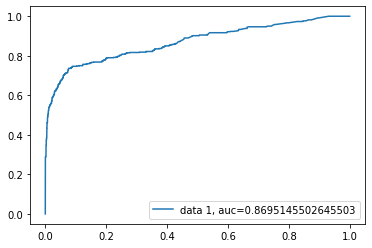

In [87]:
#  ploting  the AUC-ROC curve 
y_pred_proba = model_xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Using KNN

In [88]:
# Creating model object
model_knn = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
# Training Model
model_knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=9)

In [89]:
# Making Prediction
y_pred_knn = model_knn.predict(X_test)
# Calculating Accuracy Score
knn = round(accuracy_score(y_test, y_pred_knn)*100, 2)
print(knn)

88.08


In [90]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[2974  176]
 [ 271  329]]


In [91]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3150
           1       0.65      0.55      0.60       600

    accuracy                           0.88      3750
   macro avg       0.78      0.75      0.76      3750
weighted avg       0.87      0.88      0.88      3750



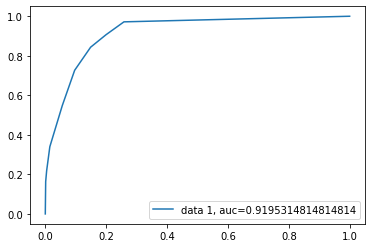

In [92]:
#  ploting  the AUC-ROC curve 
y_pred_proba = model_knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Using SVM

In [93]:
# Creating model object
model_svm = SVC(kernel='rbf', random_state = 42,probability=True)
# Training Model
model_svm.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [94]:
# Making Prediction
y_pred_svm = model_svm.predict(X_test)
# Calculating Accuracy Score
svm= round(accuracy_score(y_test, y_pred_svm)*100, 2)
print(svm)

84.0


In [95]:
# confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)

[[3150    0]
 [ 600    0]]


In [96]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      3150
           1       0.00      0.00      0.00       600

    accuracy                           0.84      3750
   macro avg       0.42      0.50      0.46      3750
weighted avg       0.71      0.84      0.77      3750



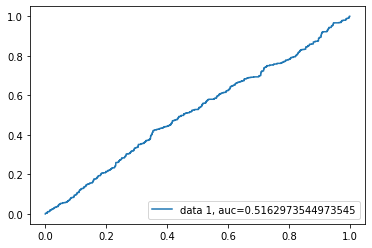

In [97]:
#  ploting  the AUC-ROC curve 
y_pred_proba = model_svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Aftr looking  all model we got to know that our data  is imbalenced all models are giving same range of accuracy and confussion matrix tp,tn,fp,fn are showing imbalence


In [98]:
#checking imbalence of data
y.value_counts()

Attrition
0            15788
1             2958
dtype: int64

In [99]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,38.0,0,Travel_Frequently,888.0,Human Resources,10.0,4.0,Human Resources,3.0,Male,71.0,3.0,2.0,Human Resources,3.0,Married,6077.0,14814.0,3.0,No,11.0,3.0,3.0,0.0,10.0,2.0,3.0,6.0,3.0,1.0,2.0,Indeed
1,51.0,0,Travel_Rarely,1302.0,Research & Development,2.0,3.0,Medical,4.0,Male,84.0,1.0,2.0,Manufacturing Director,2.0,Divorced,5482.0,16321.0,5.0,No,18.0,3.0,4.0,1.0,13.0,3.0,3.0,4.0,1.0,1.0,2.0,Indeed
2,32.0,0,Travel_Rarely,128.0,Research & Development,2.0,1.0,Life Sciences,4.0,Male,84.0,2.0,2.0,Laboratory Technician,1.0,Single,2176.0,19737.0,1.0,No,13.0,3.0,4.0,0.0,9.0,5.0,3.0,6.0,2.0,0.0,4.0,Company Website
3,26.0,0,Travel_Rarely,157.0,Research & Development,1.0,3.0,Medical,4.0,Male,90.0,3.0,2.0,Healthcare Representative,2.0,Single,5562.0,24440.0,6.0,No,14.0,3.0,4.0,0.0,19.0,3.0,3.0,10.0,7.0,0.0,9.0,GlassDoor
4,46.0,0,Travel_Rarely,734.0,Research & Development,2.0,4.0,Life Sciences,3.0,Male,46.0,3.0,5.0,Research Director,4.0,Divorced,19328.0,14218.0,1.0,Yes,17.0,3.0,3.0,1.0,24.0,3.0,3.0,2.0,1.0,2.0,2.0,GlassDoor


## Handling Imbalance dataset Using SMOTE

In [100]:
#SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
#It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [101]:
oversample = SMOTE()
smote = SMOTE(random_state = 1)
X1, y1 = oversample.fit_resample(X, y)
y1.value_counts()

Attrition
0            15788
1            15788
dtype: int64

## spliting data after smote

In [102]:
#spliting data into train and test after smote
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.3, random_state = 1)
print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (22103, 52)
The shape of X_test is: (9473, 52)
The shape of y_train is: (22103, 1)
The shape of y_test is: (9473, 1)


### Using Logistic Regression After SMOTE

In [103]:
# creating object for model
logisticRegr1 = LogisticRegression(max_iter=120,random_state=0, n_jobs=2)
# Model Training
logisticRegr1.fit(X_train, y_train)
# Making Predictions
y_pred_lr1 = logisticRegr1.predict(X_test)
# Calculating Accuracy of the model
lr1= round(accuracy_score(y_test, y_pred_lr1)*100,2)
print(lr1)

61.46


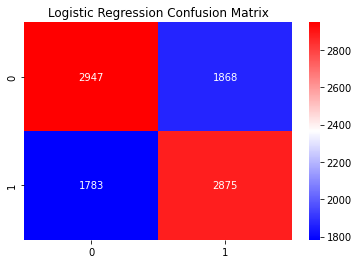

In [104]:
# confusion Matrix

cm1 = confusion_matrix(y_test, y_pred_lr1)
sns.heatmap(cm1, annot=True, fmt='d', cmap="bwr")
plt.title("Logistic Regression Confusion Matrix",fontsize=12)
plt.show()

In [105]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_lr1))

              precision    recall  f1-score   support

           0       0.62      0.61      0.62      4815
           1       0.61      0.62      0.61      4658

    accuracy                           0.61      9473
   macro avg       0.61      0.61      0.61      9473
weighted avg       0.61      0.61      0.61      9473



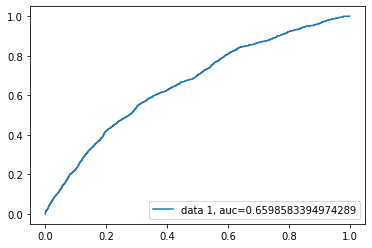

In [106]:
#  ploting  the AUC-ROC curve 
y_pred_proba = logisticRegr1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Using Random Forest after SMOTE

In [107]:
# Creating model object
model_r_f1 = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0,max_depth=5,min_samples_split=10000)
# Training Model
model_r_f1.fit(X_train, y_train)
# Making Prediction
y_pred_rf1 = model_r_f1.predict(X_test)
# Calculating Accuracy Score
rf1 = round(accuracy_score(y_test, y_pred_rf1)*100, 2)
print(rf1)

68.08


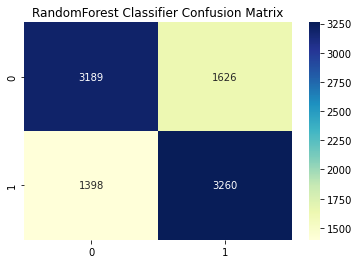

In [108]:
# confusion Maxtrix
cm3 = confusion_matrix(y_test, y_pred_rf1)
sns.heatmap(cm3, annot = True, fmt=  'd', cmap = 'YlGnBu')
plt.title("RandomForest Classifier Confusion Matrix",fontsize=12)
plt.show()

In [109]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68      4815
           1       0.67      0.70      0.68      4658

    accuracy                           0.68      9473
   macro avg       0.68      0.68      0.68      9473
weighted avg       0.68      0.68      0.68      9473



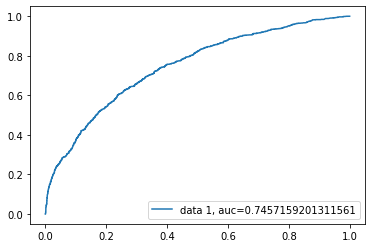

In [110]:
#  ploting  the AUC-ROC curve 
y_pred_proba = model_r_f1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Using Decision tree classifier after SMOTE

In [111]:
# Creating object of the model
model_dt1 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)
# Training Model
model_dt1.fit(X_train,y_train)
# Making Prediction
y_pred_dt1=model_dt1.predict(X_test)
# Calculating Accuracy of the model
dt1  = round(accuracy_score(y_test, y_pred_dt1)*100, 2)
print(dt1)    


67.73


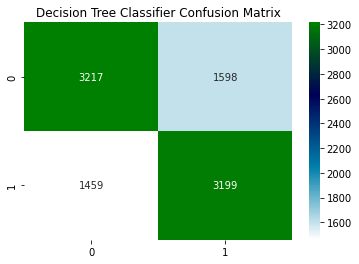

In [112]:
# confusion Maxtrix
cm2 = confusion_matrix(y_test, y_pred_dt1)
sns.heatmap(cm2, annot = True, fmt=  'd', cmap = 'ocean_r')
plt.title("Decision Tree Classifier Confusion Matrix",fontsize=12)
plt.show()

In [113]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_dt1))

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      4815
           1       0.67      0.69      0.68      4658

    accuracy                           0.68      9473
   macro avg       0.68      0.68      0.68      9473
weighted avg       0.68      0.68      0.68      9473



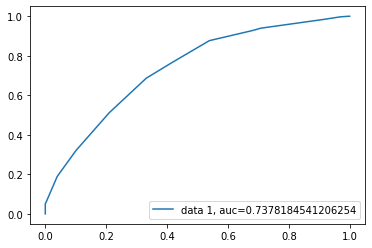

In [114]:
#  ploting  the AUC-ROC curve 
y_pred_proba = model_dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Using SVM classifier after SMOTE

In [115]:
# Creating model object
model_svm1 = SVC(kernel='rbf', random_state = 42,probability=True)
# Training Model
model_svm1.fit(X_train, y_train)
# Making Prediction
y_pred_svm1 = model_svm1.predict(X_test)
# Calculating Accuracy Score
svm1= round(accuracy_score(y_test, y_pred_svm1)*100, 2)
print(svm1)

55.82


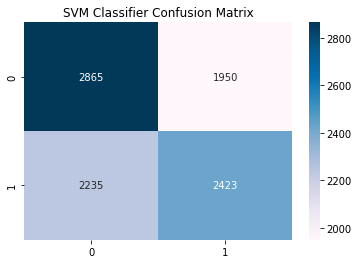

In [116]:
# confusion Maxtrix
cm6 = confusion_matrix(y_test, y_pred_svm1)
sns.heatmap(cm6, annot = True, fmt=  'd', cmap = 'PuBu')
plt.title("SVM Classifier Confusion Matrix",fontsize=12)
plt.show()

In [117]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_svm1))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58      4815
           1       0.55      0.52      0.54      4658

    accuracy                           0.56      9473
   macro avg       0.56      0.56      0.56      9473
weighted avg       0.56      0.56      0.56      9473



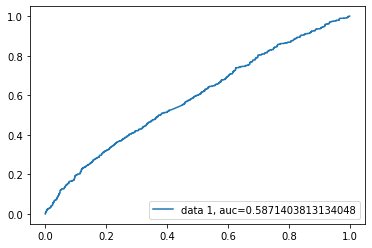

In [118]:
#  ploting  the AUC-ROC curve 
y_pred_proba = model_svm1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Using KNN classifier after SMOTE

In [119]:
# Creating model object
model_knn1 = KNeighborsClassifier(n_neighbors=9, leaf_size=20)
# Training Model
model_knn1.fit(X_train, y_train)
# Making Prediction
y_pred_knn1 = model_knn1.predict(X_test)
# Calculating Accuracy Score
knn1 = round(accuracy_score(y_test, y_pred_knn1)*100, 2)
print(knn1)

91.86


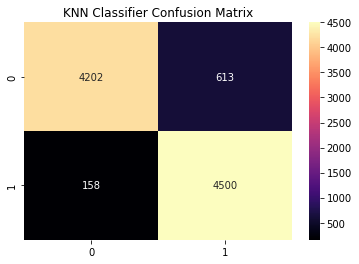

In [120]:
# confusion Maxtrix
cm5 = confusion_matrix(y_test, y_pred_knn1)
sns.heatmap(cm5, annot = True, fmt=  'd', cmap = 'magma')
plt.title("KNN Classifier Confusion Matrix",fontsize=12)
plt.show()

In [121]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_knn1))

              precision    recall  f1-score   support

           0       0.96      0.87      0.92      4815
           1       0.88      0.97      0.92      4658

    accuracy                           0.92      9473
   macro avg       0.92      0.92      0.92      9473
weighted avg       0.92      0.92      0.92      9473



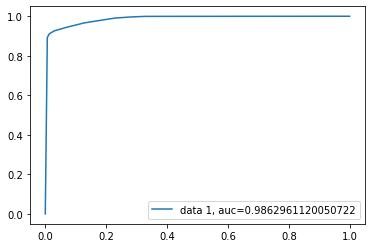

In [122]:
#  ploting  the AUC-ROC curve 
y_pred_proba = model_knn1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Using  XGBoost Classifier  after SMOTE

In [123]:
# Creating model object
model_xgb1 = XGBClassifier(random_state=1,learning_rate=0.01)
# Training Model
model_xgb1.fit(X_train, y_train)
# Making Prediction
y_pred_xgb1 = model_xgb1.predict(X_test)
# Calculating Accuracy Score
xgb1 = round(accuracy_score(y_test, y_pred_xgb1)*100, 2)
print(xgb1)

85.78


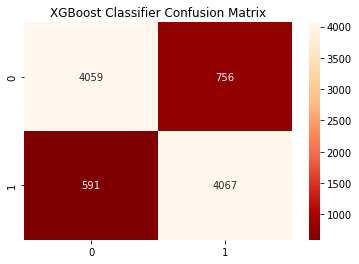

In [124]:
# confusion Maxtrix
cm4 = confusion_matrix(y_test, y_pred_xgb1)
sns.heatmap(cm4, annot = True, fmt=  'd', cmap = 'OrRd_r')
plt.title("XGBoost Classifier Confusion Matrix",fontsize=12)
plt.show()

In [125]:
# Classification Report for check accuracy
print(classification_report(y_test,y_pred_xgb1))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4815
           1       0.84      0.87      0.86      4658

    accuracy                           0.86      9473
   macro avg       0.86      0.86      0.86      9473
weighted avg       0.86      0.86      0.86      9473



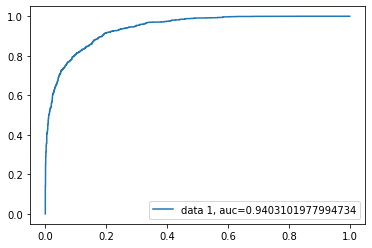

In [126]:
#  ploting  the AUC-ROC curve 
y_pred_proba = model_xgb1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# comparision of all model

,Model,Accuracy_score
10,KNN 'SMOTE',91.86
3,XGBoost,88.51
4,KNN,88.08
9,XGBoost 'SMOTE',85.78
1,Decision Tree,85.33
0,Logistic Regression,84.00
2,Random Forest,84.00
5,SVM,84.00
8,Random Forest 'SMOTE',68.08
7,Decision Tree 'SMOTE',67.73


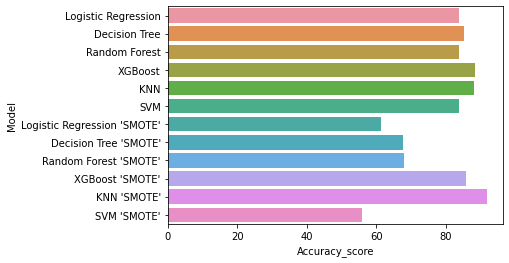

In [129]:
#Model Comparision With Bar plots.
models = pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'KNN', 'SVM', 'Logistic Regression \'SMOTE\'','Decision Tree \'SMOTE\'','Random Forest \'SMOTE\'','XGBoost \'SMOTE\'','KNN \'SMOTE\'','SVM \'SMOTE\''],
    'Accuracy_score' :[lr, dt, rf, xgb ,knn, svm, lr1, dt1, rf1, xgb1 ,knn1, svm1]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

## There is  Much Difference WHile doing SMOTE and Without SMOTE 

## Feature importance using random forest classifier

[0.0976264  0.07706891 0.05913427 0.02750421 0.02597033 0.06050213
 0.01932939 0.0155977  0.0220005  0.05827942 0.0461239  0.01523849
 0.03482122 0.00187661 0.02224768 0.01897891 0.04098809 0.02738654
 0.01872951 0.03355745 0.02623611 0.02533766 0.02671228 0.0178618
 0.00968623 0.01113059 0.01022547 0.00461356 0.00336312 0.00463081
 0.00227842 0.00402512 0.00998922 0.0029331  0.0067192  0.0019664
 0.00437658 0.00213481 0.00623483 0.00702804 0.0056017  0.00778398
 0.0114774  0.02148024 0.00860817 0.00475156 0.0048307  0.00610369
 0.00466612 0.00471362 0.00326767 0.00627012]


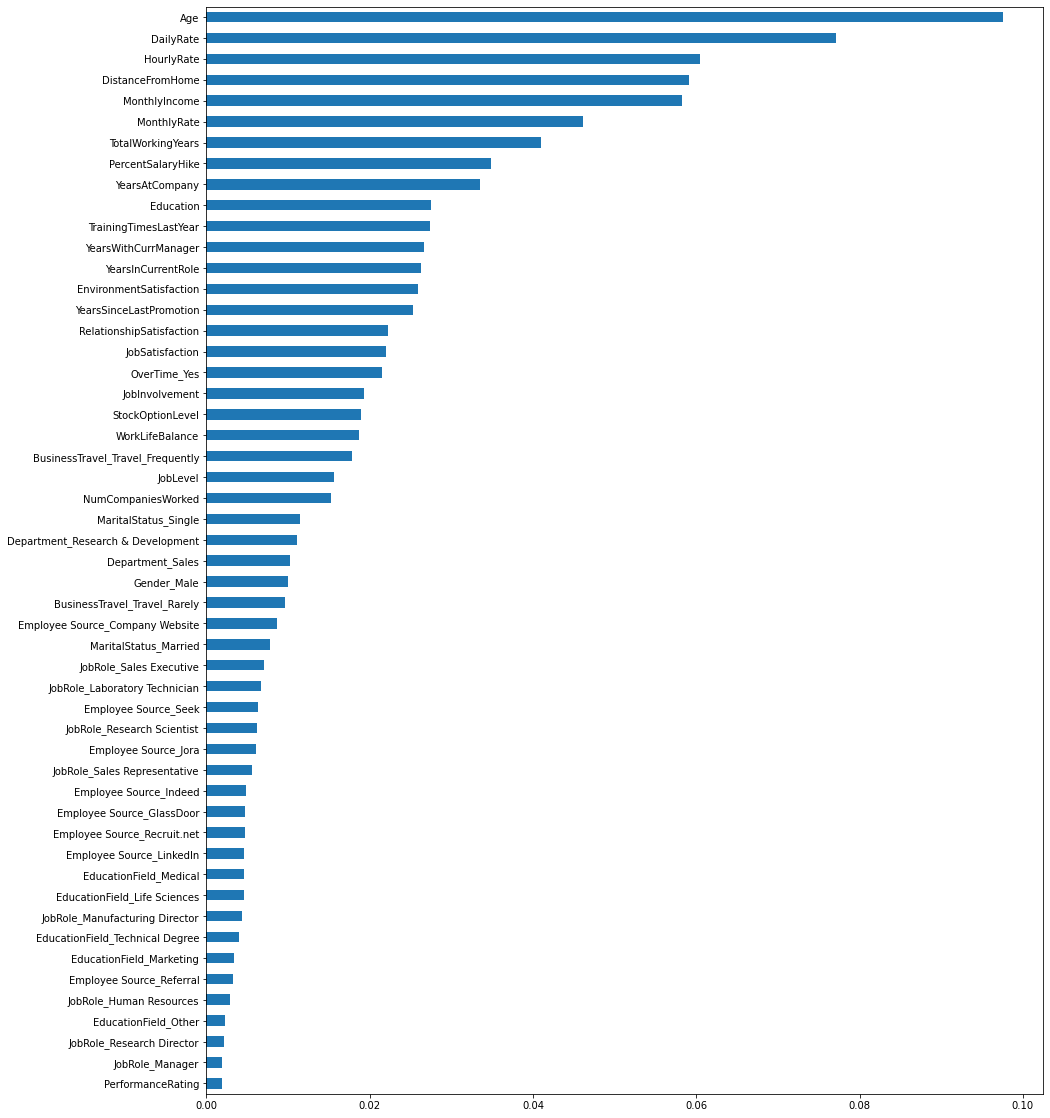

In [130]:
#plotting+feature importance in model using random forest classifier
modelRF = RandomForestClassifier()
modelRF.fit(X,y)
modelRF.feature_importances_
print(modelRF.feature_importances_)
column_name = pd.Series(modelRF.feature_importances_,index=X.columns)
plt.figure(figsize =(15,20))
column_name.sort_values(ascending=True).plot(kind='barh')
plt.show()

# Hyper-Parameter Tuning Random Forest

In [131]:
#Hyperparameters are parameters that are defined before training to specify how we want model training to happen.
#We have full control over hyperparameter settings and by doing that we control the learning process.
#Hyperparameter tuning is finding the best combination of hyperparameters that gives the best performance according to the defined scoring metric.
#Random forest classifier has many hyperparameters and if the model is instantiated without defining hyperparameters, then it will have default values. 

In [132]:
# hyperparameter tuning using gridserch for randomforst classifer
from sklearn.model_selection import GridSearchCV
rfgridcv=GridSearchCV(estimator=RandomForestClassifier(),
param_grid=[{'n_estimators': [5,10,50],
                               'max_depth':[5,10,15,20],
                               'min_samples_leaf':[10,50,100],
                               'min_samples_split': [20,100,200]}])
rfgridcv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15, 20],
                          'min_samples_leaf': [10, 50, 100],
                          'min_samples_split': [20, 100, 200],
                          'n_estimators': [5, 10, 50]}])

In [133]:
#predicting for xtest and xtrain
y_train_pred=rfgridcv.predict(X_train)
y_train_prob=rfgridcv.predict_proba(X_train)[:,1]

y_test_pred=rfgridcv.predict(X_test)
y_test_prob=rfgridcv.predict_proba(X_test)[:,1]


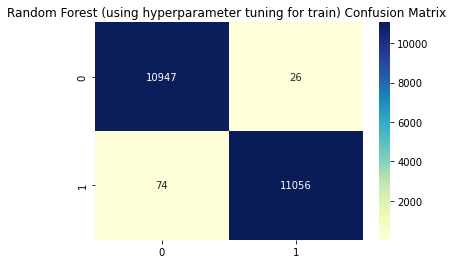

In [134]:
#confussion matrix for train data
cmm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cmm, annot = True, fmt=  'd', cmap = 'YlGnBu')
plt.title("Random Forest (using hyperparameter tuning for train) Confusion Matrix ",fontsize=12)
plt.show()

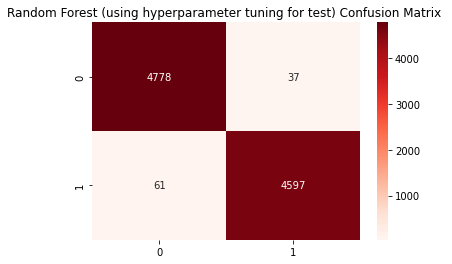

In [135]:
#confussion matrix for test data
cmm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cmm, annot = True, fmt=  'd', cmap = 'Reds')
plt.title("Random Forest (using hyperparameter tuning for test) Confusion Matrix ",fontsize=12)
plt.show()

In [136]:
# printing accuracy score and classification report of both test and train
print('Accuracy Score-Train\n',accuracy_score(y_train,y_train_pred))
print('Classification Report-Train\n',classification_report(y_train,y_train_pred))
print('AUC Score-Train\n',roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Accuracy Score-Test\n',accuracy_score(y_test,y_test_pred))
print('Classification Report-Test\n',classification_report(y_test,y_test_pred))
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))


Accuracy Score-Train
 0.9954757272768402
Classification Report-Train
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     10973
           1       1.00      0.99      1.00     11130

    accuracy                           1.00     22103
   macro avg       1.00      1.00      1.00     22103
weighted avg       1.00      1.00      1.00     22103

AUC Score-Train
 0.9998959710713604



Accuracy Score-Test
 0.989654808402829
Classification Report-Test
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4815
           1       0.99      0.99      0.99      4658

    accuracy                           0.99      9473
   macro avg       0.99      0.99      0.99      9473
weighted avg       0.99      0.99      0.99      9473

AUC Score-Test
 0.9992566078435831


Plot : AUC-ROC Curve
AUC Score-Test
 0.9992566078435831


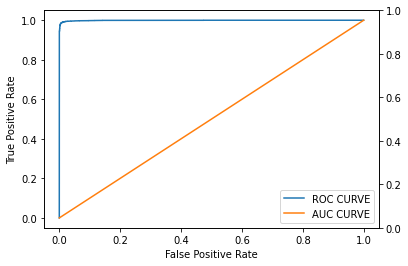

In [137]:
#ploting AUC-ROC curve
print('Plot : AUC-ROC Curve')
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
thresholds[0] = thresholds[0]-1
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr,label='ROC CURVE')
ax1.plot(fpr,fpr,label='AUC CURVE')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
plt.legend(loc='best')
ax2=ax1.twinx()
plt.show()

### cross validating for check wether the model is overfited or underfitted 
Cross-validation is a statistical method used to estimate the performance (or accuracy) of machine learning models.
It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited.

In [139]:
#checking with sklearn cross validate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=1000, random_state=1, criterion='entropy', bootstrap=True, oob_score=True, verbose=1)
cv_dict = cross_validate(model, X, y, return_train_score=True)
cv_dict

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   29.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   29.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    4.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

{'fit_time': array([35.63753057, 35.98626351, 41.73789883, 36.08808088, 36.71426678]),
 'score_time': array([1.15723085, 1.09647346, 1.07446456, 1.09833312, 1.08821821]),
 'test_score': array([0.99653333, 0.99706588, 0.99626567, 0.99706588, 0.99813284]),
 'train_score': array([1., 1., 1., 1., 1.])}

* By cross  validation also it proved random forest gridsearchcv model giving best accuracy
* So After applying Hypertunning with best Estimators 
* I have got Train and Test Accuracy of
    Train = 1.00 &
    Test  = 0.99
* This Accuracy Neither Overfit nor Underfit.
* Its Balanced Accuracy So this is The Best Generalized Model for Model Builduing.

# testing our model to future data and predicting for future data

# Read The Test_Data

In [141]:
#reading test data 
test_data = pd.read_csv("IBM HR test_data.csv")

In [142]:
#displaying
test_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,10,123465,4.0,Female,33.0,3.0,4.0,Manager,3.0,Divorced,14756.0,19730.0,2.0,Y,Yes,14.0,3.0,3.0,80.0,3.0,21.0,2.0,3.0,5.0,0.0,0.0,2.0,Company Website
1,41,Travel_Rarely,1085.0,Research & Development,2.0,4.0,Life Sciences,1.0,4904,128359,2.0,Female,50.0,2.0,1.0,Sales Representative,3.0,Single,1200.0,9724.0,1.0,Y,No,12.0,3.0,1.0,80.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,LinkedIn
2,41,Travel_Rarely,1085.0,Research & Development,2.0,4.0,Life Sciences,1.0,4908,128363,2.0,Female,50.0,2.0,1.0,Sales Representative,3.0,Single,1200.0,9724.0,8.0,Y,No,12.0,3.0,1.0,80.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,LinkedIn
3,41,Travel_Frequently,143.0,Sales,4.0,3.0,Marketing,1.0,5929,129384,1.0,Male,56.0,3.0,2.0,Sales Executive,2.0,Single,9355.0,9558.0,1.0,Y,No,18.0,3.0,3.0,80.0,0.0,8.0,5.0,3.0,8.0,7.0,7.0,7.0,Adzuna
4,41,Travel_Frequently,143.0,Sales,4.0,3.0,Marketing,1.0,5931,129386,1.0,Male,56.0,3.0,2.0,Sales Executive,2.0,Single,9355.0,9558.0,1.0,Y,No,18.0,3.0,3.0,80.0,0.0,8.0,5.0,3.0,8.0,7.0,7.0,7.0,Adzuna


# Check the shape of data

In [143]:
#checking shape
test_data.shape

(4687, 36)

In [144]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4687 non-null   int64  
 1   BusinessTravel            4687 non-null   object 
 2   DailyRate                 4686 non-null   float64
 3   Department                4685 non-null   object 
 4   DistanceFromHome          4686 non-null   float64
 5   Education                 4685 non-null   float64
 6   EducationField            4684 non-null   object 
 7   EmployeeCount             4686 non-null   float64
 8   EmployeeNumber            4687 non-null   object 
 9   Application ID            4687 non-null   object 
 10  EnvironmentSatisfaction   4685 non-null   float64
 11  Gender                    4685 non-null   object 
 12  HourlyRate                4686 non-null   float64
 13  JobInvolvement            4684 non-null   float64
 14  JobLevel

#checking numeric and categorical features in this dataset

In [145]:
#catogoric features
test_data_categoric = test_data.select_dtypes(include = object)
test_data_categoric.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'EmployeeNumber',
       'Application ID', 'Gender', 'JobRole', 'MaritalStatus', 'Over18',
       'OverTime', 'Employee Source'],
      dtype='object')

In [146]:
#numeric features
test_data_numeric_fea = test_data.select_dtypes(include=np.number)
test_data_numeric_fea.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# check for any null values

In [147]:
test_data.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   1
Department                  2
DistanceFromHome            1
Education                   2
EducationField              3
EmployeeCount               1
EmployeeNumber              0
Application ID              0
EnvironmentSatisfaction     2
Gender                      2
HourlyRate                  1
JobInvolvement              3
JobLevel                    1
JobRole                     1
JobSatisfaction             1
MaritalStatus               3
MonthlyIncome               1
MonthlyRate                 1
NumCompaniesWorked          3
Over18                      4
OverTime                    5
PercentSalaryHike           1
PerformanceRating           1
RelationshipSatisfaction    3
StandardHours               2
StockOptionLevel            1
TotalWorkingYears           2
TrainingTimesLastYear       3
WorkLifeBalance             2
YearsAtCompany              1
YearsInCurrentRole          6
YearsSince

In [148]:
#finding percentage of null values
Null_values_percentage=(test_data.isnull().sum().sum()/len(test_data))*100
Null_values_percentage

1.386814593556646

# In Our  TestData there are 1.3% of Null Values

In this data only 1.3% null values are there we easly drop them it do not affect our model
but we not droped computed with meadian and mode

In [149]:
#computing null values of catogoric features with mode
for column in ["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus","Over18","OverTime","Employee Source"]:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

In [150]:
#computing null values of all numeric featurs with median
test_data=test_data.fillna(test_data.median())

In [151]:
test_data.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Application ID              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

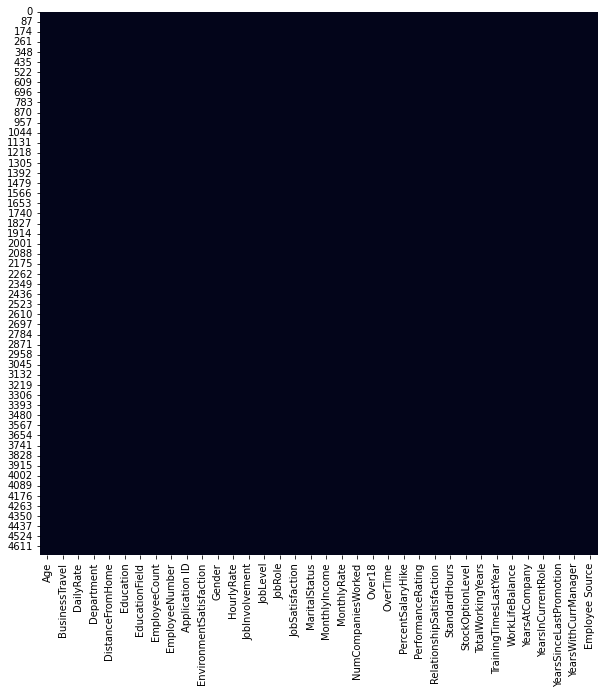

In [152]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(test_data.isnull(), cbar=False)

# 65 null values are present in our dataset

#now there is no null values all are computed with median and mode

In [153]:
#checking datatype of featues
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       4687 non-null   int64  
 1   BusinessTravel            4687 non-null   object 
 2   DailyRate                 4687 non-null   float64
 3   Department                4687 non-null   object 
 4   DistanceFromHome          4687 non-null   float64
 5   Education                 4687 non-null   float64
 6   EducationField            4687 non-null   object 
 7   EmployeeCount             4687 non-null   float64
 8   EmployeeNumber            4687 non-null   object 
 9   Application ID            4687 non-null   object 
 10  EnvironmentSatisfaction   4687 non-null   float64
 11  Gender                    4687 non-null   object 
 12  HourlyRate                4687 non-null   float64
 13  JobInvolvement            4687 non-null   float64
 14  JobLevel

## changing data type of features
some featues having numeric values but object datatype we can chnge that features to int or float it can help to future implimentation

In [154]:
# rename the column name to avoid the error
test_data.rename(columns = {'Application ID':'Application_ID'}, inplace = True)

In [155]:
# in employe number column also 3 un matched strings are there
test_data = test_data[test_data.EmployeeNumber != 'Test']
test_data = test_data[test_data.EmployeeNumber != 'TESTING']
test_data = test_data[test_data.EmployeeNumber != 'TEST']


In [156]:
# in application_id  column also there are 2 unmatched string are there
test_data = test_data[test_data.Application_ID != '?????']
test_data = test_data[test_data.Application_ID != 'Test']


In [157]:
for col in['EmployeeNumber','Application_ID',]:
     test_data[col] = test_data[col].astype('float')

In [158]:
test_data.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Application_ID              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [159]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of all categorical variables as tere are no numerical variables in the dataset
test_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,Application_ID,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,4683.000000,4683.000000,4683.000000,4683.000000,4683.0,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.0,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000,4683.000000
mean,36.990818,809.793295,9.315396,2.893017,1.0,11759.877643,135216.607944,2.724108,65.696776,2.723254,2.058510,2.720692,6464.298740,14398.790519,2.630365,15.185992,3.145633,2.703609,80.0,0.788384,11.125347,2.792868,2.760410,6.997224,4.213325,2.137519,4.109332
std,9.210559,407.862828,8.167997,1.021909,0.0,6797.141893,6796.451709,1.096531,20.462766,0.710773,1.101431,1.092151,4683.205656,7084.986465,2.477716,3.641478,0.352776,1.087835,0.0,0.837666,7.684696,1.289649,0.701676,6.145658,3.610639,3.143222,3.569892
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,123457.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,5858.000000,129313.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2904.000000,8366.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,809.000000,7.000000,3.000000,1.0,11908.000000,135363.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4936.000000,14377.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1179.000000,14.000000,4.000000,1.0,17677.500000,141132.500000,4.000000,83.000000,3.000000,3.000000,4.000000,8333.500000,20420.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,23514.000000,146969.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


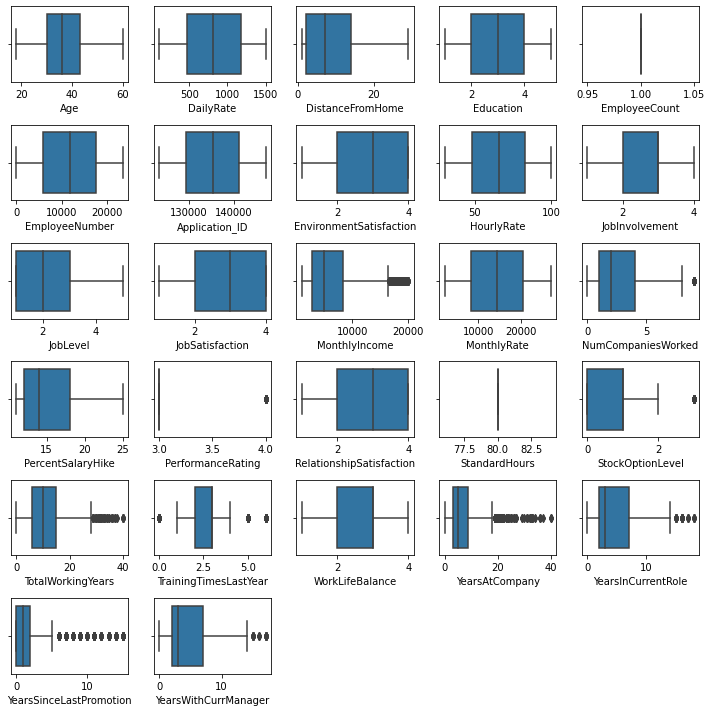

In [160]:
#checking outlier using boxplot
object_ = test_data.select_dtypes(include=["object"]).columns
count = 1
plt.figure(figsize=(10,10))
for i in test_data.columns:
    if i not in object_:
        plt.subplot(6,5,count)
        sns.boxplot(test_data[i])
        count = count+1
plt.tight_layout()

In [161]:
#removing outlier using IQR
Q1=test_data.quantile(0.25)

Q3=test_data.quantile(0.75)

IQR=Q3-Q1

condition = ~((test_data < (Q1 - 1.5 * IQR)) | (test_data > (Q3 + 1.5 * IQR))).any(axis=1)


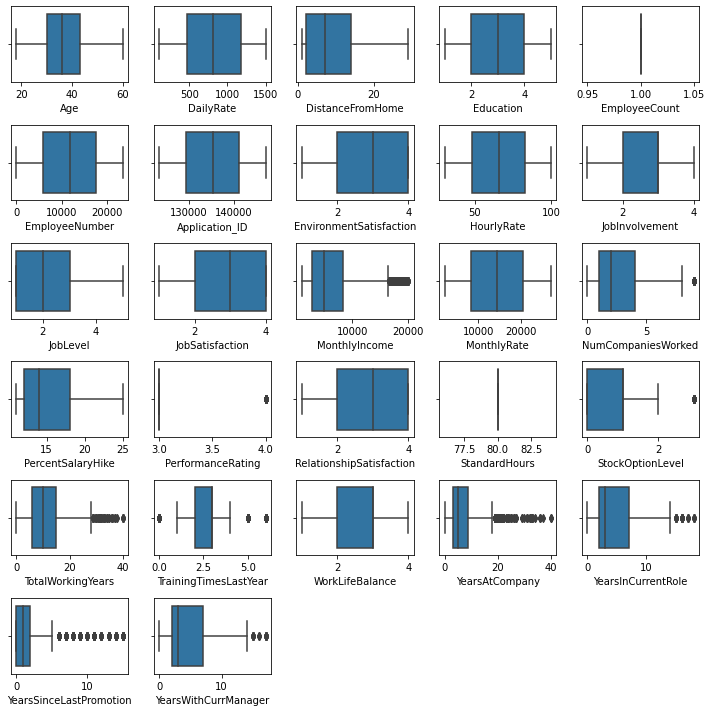

In [162]:
#after removal of outlier checking outlier goes or not using boxplot
object_ = test_data.select_dtypes(include=["object"]).columns
count = 1
plt.figure(figsize=(10,10))
for i in test_data.columns:
    if i not in object_:
        plt.subplot(6,5,count)
        sns.boxplot(test_data[i])
        count = count+1
plt.tight_layout()

In [163]:
#checking co-realation of data
corelation=test_data.corr()
corelation

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,Application_ID,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.039679,-0.001179,0.224704,NaN,-0.015350,-0.015434,0.003725,-0.002979,0.000069,0.260064,-0.032380,0.249071,0.028409,0.045130,-0.023243,-0.027591,0.006422,NaN,0.020178,0.321854,0.005792,0.012515,0.131184,0.093248,0.087548,0.060460
DailyRate,0.039679,1.000000,0.007550,0.012274,NaN,-0.021012,-0.021201,0.005779,0.013207,0.015565,-0.027302,0.020050,-0.029464,-0.019727,0.042160,0.006491,0.010848,-0.021392,NaN,0.008549,-0.000492,-0.039346,-0.028631,-0.052187,-0.044772,-0.046117,-0.056451
DistanceFromHome,-0.001179,0.007550,1.000000,0.038946,NaN,0.029536,0.029563,0.009741,0.011447,0.019894,-0.009886,-0.045071,-0.019988,-0.017545,0.076038,0.049916,0.021859,-0.026206,NaN,-0.002324,0.008047,-0.023521,0.021535,0.002051,0.002896,-0.009676,0.015488
Education,0.224704,0.012274,0.038946,1.000000,NaN,0.004767,0.004674,-0.021771,0.023993,0.042447,0.049966,0.006328,0.040559,-0.000431,0.048909,-0.006762,-0.014834,-0.022958,NaN,0.015215,0.087163,-0.015035,0.007138,0.033587,0.042018,0.047137,0.043019
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.015350,-0.021012,0.029536,0.004767,NaN,1.000000,0.999970,0.476907,0.341130,0.006541,-0.017823,-0.055019,-0.015742,0.025608,0.002370,-0.019041,-0.027660,-0.052324,NaN,0.033730,-0.015732,0.054977,-0.001668,-0.007667,0.001692,-0.002344,0.010192
Application_ID,-0.015434,-0.021201,0.029563,0.004674,NaN,0.999970,1.000000,0.476782,0.341122,0.006573,-0.017881,-0.055245,-0.015818,0.025793,0.002417,-0.018941,-0.027620,-0.052338,NaN,0.033610,-0.015793,0.054926,-0.001586,-0.007729,0.001669,-0.002332,0.010115
EnvironmentSatisfaction,0.003725,0.005779,0.009741,-0.021771,NaN,0.476907,0.476782,1.000000,0.398689,-0.009196,-0.016518,-0.022804,-0.022338,0.046346,-0.015138,-0.025498,-0.020894,-0.026668,NaN,0.017577,-0.013587,0.014709,0.021500,-0.008196,0.009042,0.025511,-0.007625
HourlyRate,-0.002979,0.013207,0.011447,0.023993,NaN,0.341130,0.341122,0.398689,1.000000,0.045201,-0.015105,-0.075726,-0.015715,-0.000322,-0.005459,-0.011574,-0.005657,-0.007358,NaN,0.021575,-0.000551,0.035464,0.003983,0.002548,-0.000853,-0.014564,-0.004859
JobInvolvement,0.000069,0.015565,0.019894,0.042447,NaN,0.006541,0.006573,-0.009196,0.045201,1.000000,-0.037696,-0.029160,-0.047169,-0.007430,-0.015408,0.000499,-0.009591,0.016540,NaN,0.030401,-0.024539,-0.012453,-0.013922,-0.010151,0.012523,-0.015084,0.030025


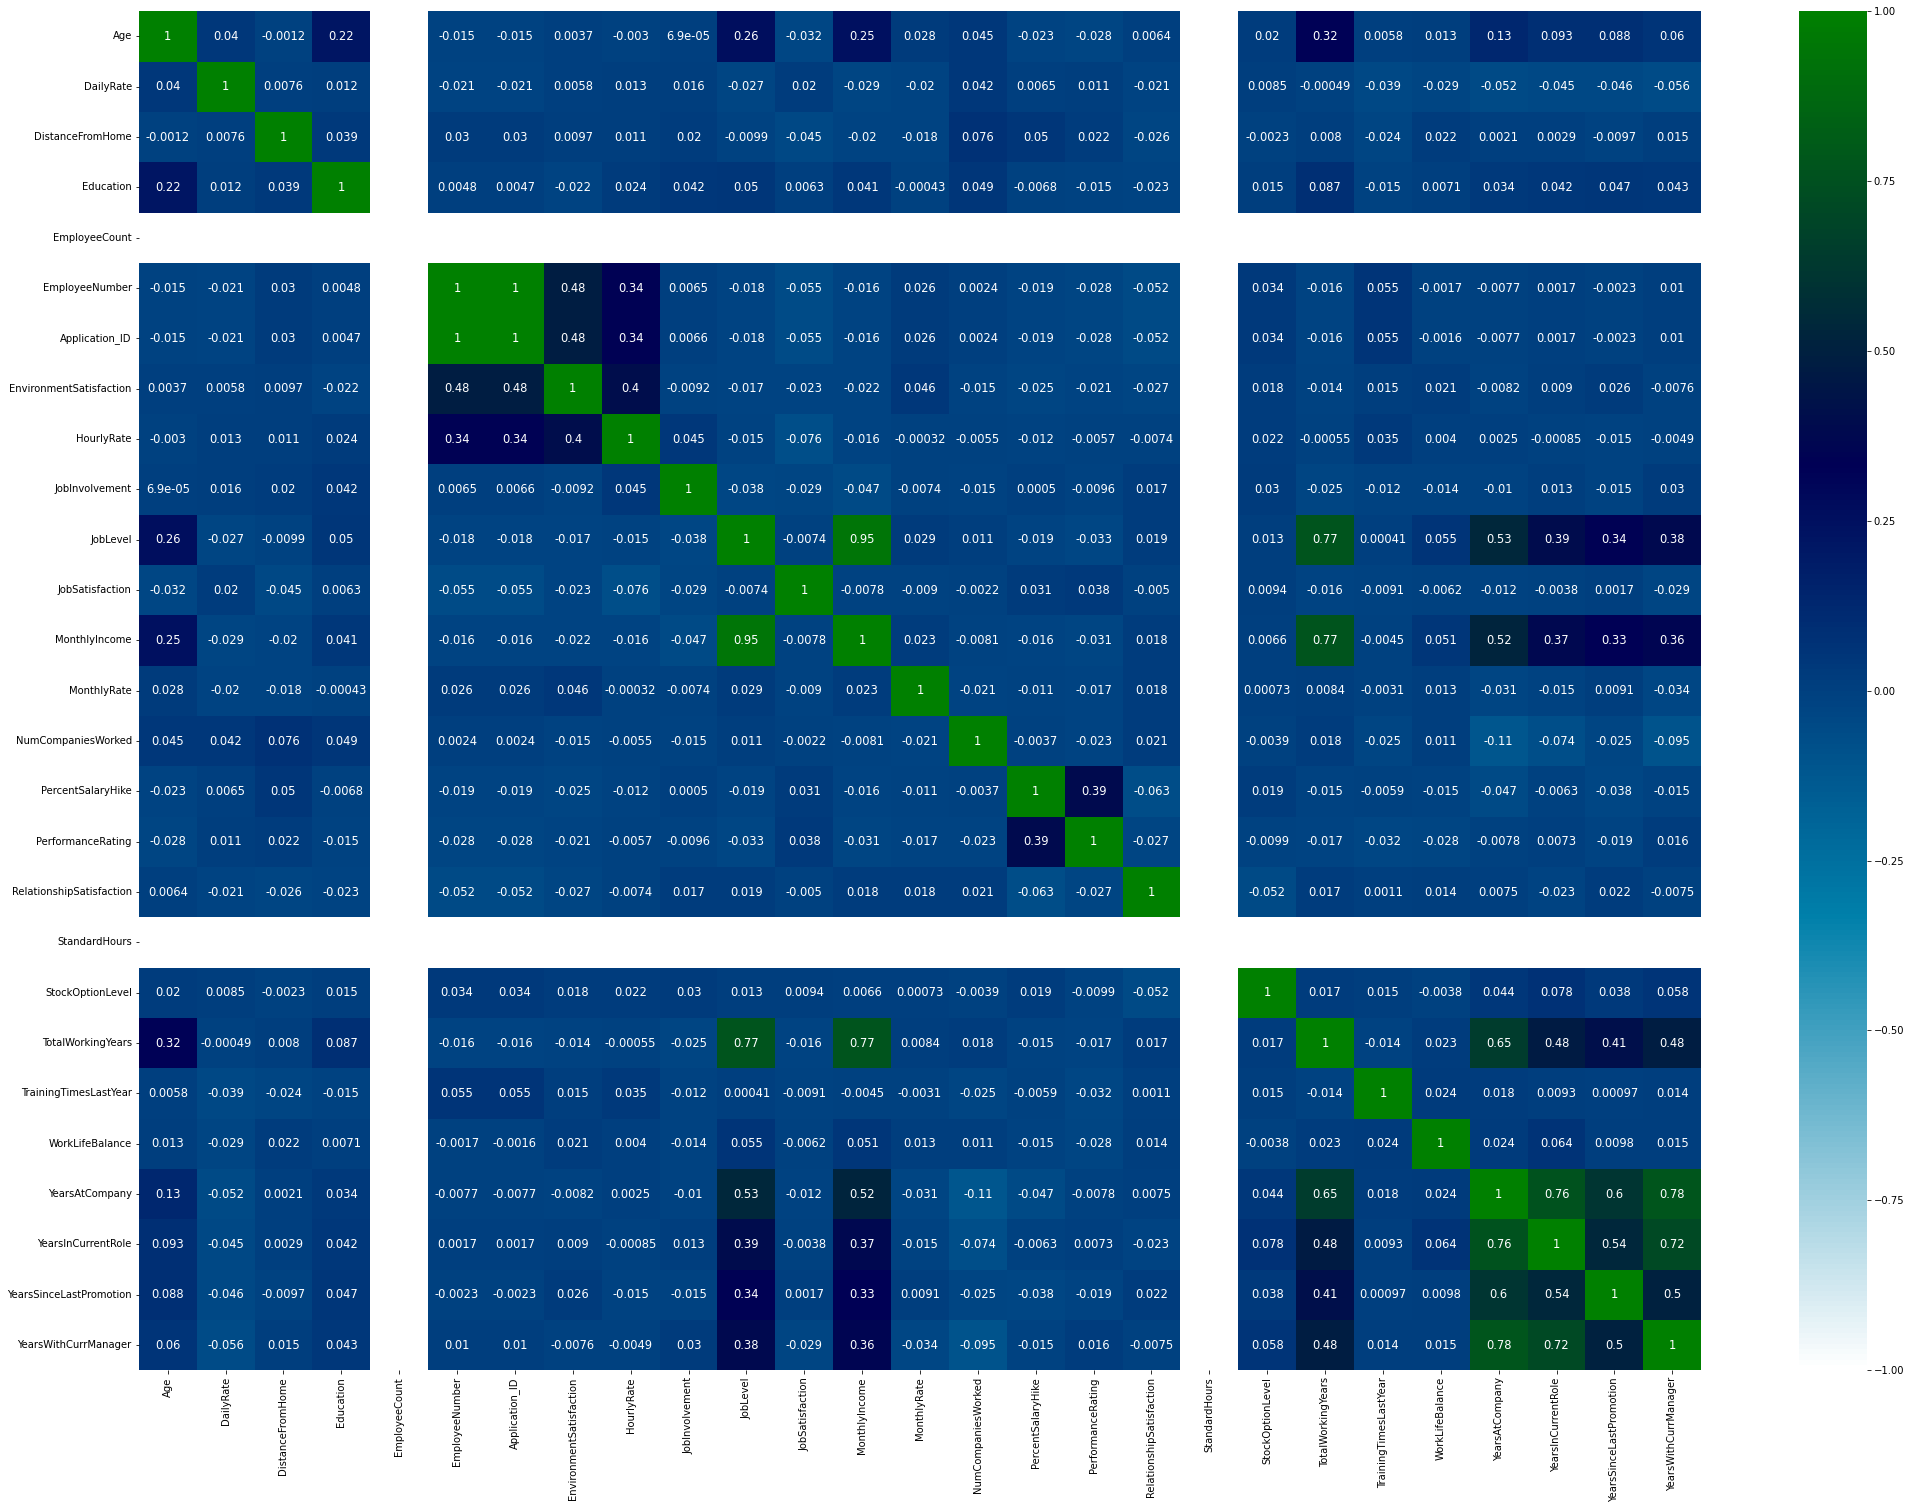

In [164]:
#ploting correlation
plt.figure(figsize = (35,25))
sns.heatmap(corelation, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'ocean_r', annot_kws = {"size": 11.5})
plt.show()

In [165]:
#saving application id for display future prediction 
ID_prediction=test_data["Application_ID"]
ID_prediction.head()

0    123465.0
1    128359.0
2    128363.0
3    129384.0
4    129386.0
Name: Application_ID, dtype: float64

In [166]:
#removing Unnecessary column from data set 
test_data=test_data.drop(['Application_ID'],axis=1)
test_data=test_data.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],axis=1)

In [167]:
test_data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Employee Source'],
      dtype='object')

In [168]:
#checking shape of data after all cleaning
test_data.shape

(4683, 31)

In [169]:
#checking numeric features
numeric_fea = test_data.select_dtypes(include=np.number)
numeric_fea.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [170]:
#checking catagorical features
categoric = test_data.select_dtypes(include = object)
categoric.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'Employee Source'],
      dtype='object')

In [171]:
#making encoding for changing catagoricl values to numerical using dummy encoding
dummy_encoded = pd.get_dummies(categoric, drop_first = True)

In [172]:
#joining the dummy encoded values and numeric values for future moddel building
test_data_dummy = pd.concat([numeric_fea, dummy_encoded], axis=1)
test_data_dummy.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,41,1102.0,1.0,2.0,4.0,33.0,3.0,4.0,3.0,14756.0,19730.0,2.0,14.0,3.0,3.0,3.0,21.0,2.0,3.0,5.0,0.0,0.0,2.0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
1,41,1085.0,2.0,4.0,2.0,50.0,2.0,1.0,3.0,1200.0,9724.0,1.0,12.0,3.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
2,41,1085.0,2.0,4.0,2.0,50.0,2.0,1.0,3.0,1200.0,9724.0,8.0,12.0,3.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
3,41,143.0,4.0,3.0,1.0,56.0,3.0,2.0,2.0,9355.0,9558.0,1.0,18.0,3.0,3.0,0.0,8.0,5.0,3.0,8.0,7.0,7.0,7.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
4,41,143.0,4.0,3.0,1.0,56.0,3.0,2.0,2.0,9355.0,9558.0,1.0,18.0,3.0,3.0,0.0,8.0,5.0,3.0,8.0,7.0,7.0,7.0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [173]:
test_data_dummy.shape

(4683, 52)

In [174]:
#pridiction of globle sales for test data using random forest hypertuned model
Employee_attrition_predictions = rfgridcv.predict(test_data_dummy)
Employee_attrition_predictions

array([0, 1, 1, ..., 0, 0, 0])

In [175]:
type(Employee_attrition_predictions)
type(ID_prediction)

pandas.core.series.Series

In [176]:
#creating the dataframe for predicted values
df = pd.DataFrame(Employee_attrition_predictions)
df.rename({0:"Employee_Attrition"},inplace =True,axis=1)

In [178]:
# joining the predicted values with application Id
dataframe  = pd.DataFrame()
dataframe = pd.concat([ID_prediction.reset_index(drop=True),df.reset_index(drop=True)],axis=1)
dataframe

,Application_ID,Employee_Attrition
0,123465.0,0
1,128359.0,1
2,128363.0,1
3,129384.0,1
4,129386.0,1
...,...,...
4678,134640.0,0
4679,137548.0,0
4680,137550.0,0
4681,137553.0,0


In [179]:
# renaming the columns name
dataframe  = dataframe.rename(columns={"Application_ID":"Application ID ","Employee_Attrition":"Attrition"})

In [180]:
# changing the target into encoding  as given in the sampple format

dataframe["Attrition"] = dataframe["Attrition"].replace(0,"Current employee")
dataframe["Attrition"] = dataframe["Attrition"].replace(1,"Voluntary Resignation")

In [185]:
#save the file into csv file
dataframe.to_csv("Attrition_Testdata_prediction.csv",index=False)

### saving predicted values as csv file with Application ID